# Haar Cascades based approach

In [4]:
!pip3 install opencv-python==3.4.8.29

Defaulting to user installation because normal site-packages is not writeable
ERROR: Ignored the following yanked versions: 3.4.11.39
ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.8.29 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74, 4.8.0.76, 4.8.1.78)
ERROR: No matching distribution found for opencv-python==3.4.8.29


In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
cascadePath = './Weights/'
imgPath = './Images/'

In [7]:
frontalCascade = cv2.CascadeClassifier(cascadePath + 'haarcascade_frontalface_alt2.xml')
profileCascade = cv2.CascadeClassifier(cascadePath + 'haarcascade_profileface.xml')

doubleCascade  =cv2.CascadeClassifier(cascadePath+'frontalEyes35x16.xml')
eyesCascade = cv2.CascadeClassifier(cascadePath+'haarcascadeoneeye.xml')

noseCascade = cv2.CascadeClassifier(cascadePath+'Nariz.xml')
mouthCascade = cv2.CascadeClassifier(cascadePath+'haarcascade_mcs_mouth.xml')

## profile

(1690, 1310, 3)


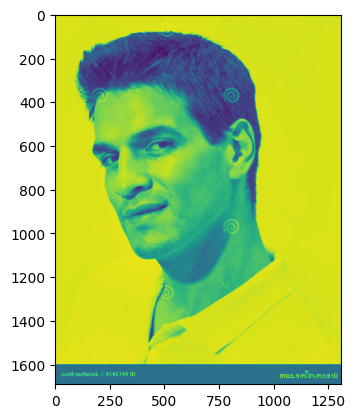

In [23]:
img = cv2.imread(imgPath + 'img2.jpg')
img = cv2.flip(img,1)
image = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(image.shape)
plt.imshow(img)

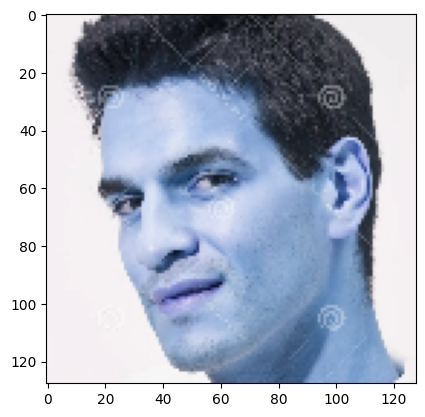

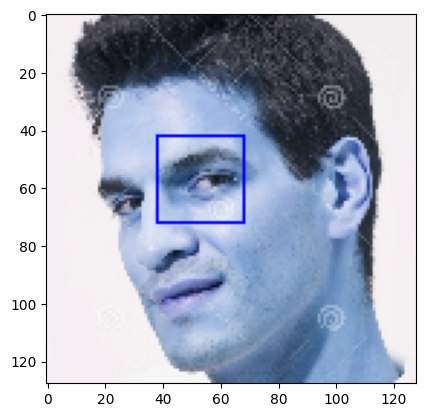

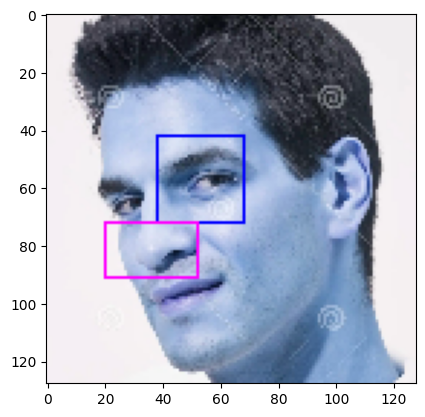

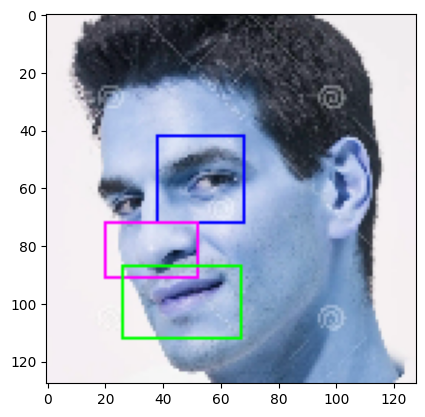

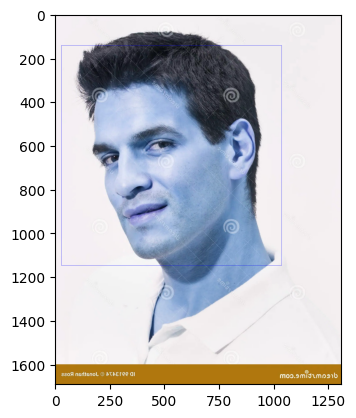

In [24]:
faces = profileCascade.detectMultiScale(img,minNeighbors=1)
colors=[(0,0,255),(255,0,255),(0,255,0)]
#red,blue+red,green
#eyes,nose,mouth
#red,yellow,green
#blue face

for face in faces:
  X1,Y1,W,H = face
  X2,Y2 = X1+W,Y1+H

  factor = 0.15
  X1 = int(X1 - W/2*factor)
  Y1 = int(Y1 - H/2*factor)
  X2 = int(X2 + W/2*factor)
  Y2 = int(Y2 + H/2*factor)

  faceimg = img[Y1:Y2,X1:X2]
  if faceimg.size == 0: continue
  faceimg = cv2.resize(faceimg,(128,128))
  # cv2.rectangle(image,(X1,Y1),(X2,Y2),(255,0,0),2)

  FACE = image[Y1:Y2,X1:X2]
  FACE = cv2.resize(FACE,(128,128))
  plt.figure(1)
  plt.imshow(FACE)

  eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=3)
  eyes = profileeyes(eyes)

  if len(eyes) != 0:
    x1,y1,x2,y2 = eyes
    cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[0],1)
    plt.figure(2)
    plt.imshow(FACE)

    noses = noseCascade.detectMultiScale(faceimg,1.03,minNeighbors=2)
    mouths = mouthCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    noses = profilenose(noses,eyes)
    mouths = profilemouth(mouths,eyes)

    color = (0,0,255)
    if len(noses) == 0 and len(mouths) == 0:
      color = (0,255,0)

    if len(noses) != 0:
      x1,y1,x2,y2 = noses
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[1],1)
      plt.figure(3)
      plt.imshow(FACE)

    if len(mouths) != 0:
      x1,y1,x2,y2 = mouths
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[2],1)
      plt.figure(4)
      plt.imshow(FACE)

    cv2.rectangle(image,(X1,Y1),(X2,Y2),color,1)

plt.figure(5)
plt.imshow(image)

In [25]:
def profileeyes(eyes):
  if len(eyes) == 0: return ()
  for eye in eyes:
    x1,y1,w,h = eye
    x2,y2 = x1+w,y1+h
    eyespoint = ((x1+x2)//2,(y1+y2)//2)

    # EYEY = (40,64)
    # EYEX = (20,80)
    EYEX = (25,80)
    EYEY = (40,64)

    if eyespoint[1]>=EYEY[0] and eyespoint[1]<=EYEY[1]:
      if eyespoint[0]>=EYEX[0] and eyespoint[0]<=EYEX[1]:
        return x1,y1,x2,y2

  return ()

In [26]:
def profilenose(noses,eyes):
  if len(noses) == 0: return ()

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for nose in noses:
    x1,y1,w,h = nose
    x2,y2 = x1+w,y1+h
    nosepoint = ((x1+x2)//2,(y1+y2)//2)

    # NOSEY = (64,86)
    # NOSEX = (15,48)
    MNOSEX = (-30,0)
    NOSEY = (64,86)

    if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
      if nosepoint[0]>=X + MNOSEX[0] and nosepoint[0]<=X+MNOSEX[1]:
        return x1,y1,x2,y2

  return ()

In [27]:
def profilemouth(mouths,eyes):
  if len(mouths) == 0: return ()

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for mouth in mouths:
    x1,y1,w,h = mouth
    x2,y2 = x1+w,y1+h
    mouthpoint = ((x1+x2)//2,(y1+y2)//2)

    # MOUTHY = (86,110)
    # MOUTHX = (30,65)
    MMOUTHX = (-30,8)
    MOUTHY = (86,110)

    if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
      if mouthpoint[0]>=X+MMOUTHX[0] and mouthpoint[0]<=X+MMOUTHX[1]:
        return x1,y1,x2,y2

  return ()

## frontal

In [28]:
# # EYEX = (20,80)

# # MEYEX = (40-52.5,65-52.5)
# # MNOSEX = (25-58,55-58)
# # MMOUTHX = (30-58,70-58)

# EYEX = (25,80)
# MNOSEX = (-30,0)
# MMOUTHX = (-30,8)
# # MMOUTHX = (-30,20)


# EYEY = (40,64)
# NOSEY = (64,86)
# MOUTHY = (86,110)

In [30]:
img = cv2.imread(imgPath + 'img2.jpg')
image = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(image.shape)

(1690, 1310, 3)


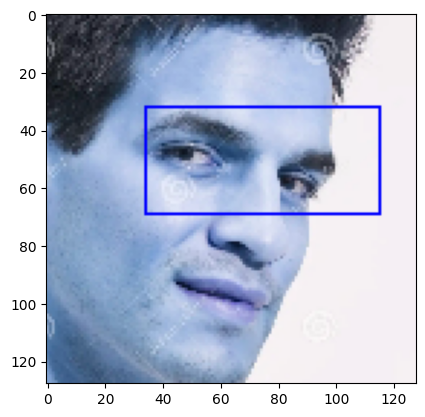

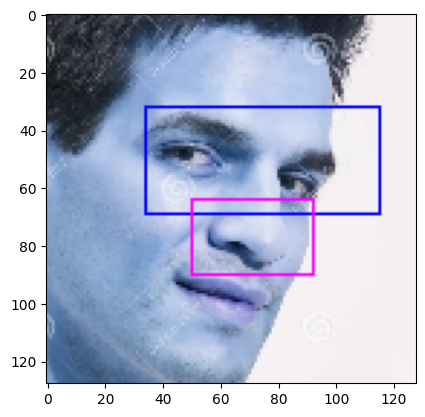

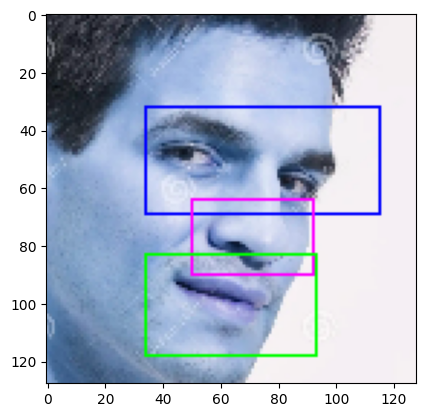

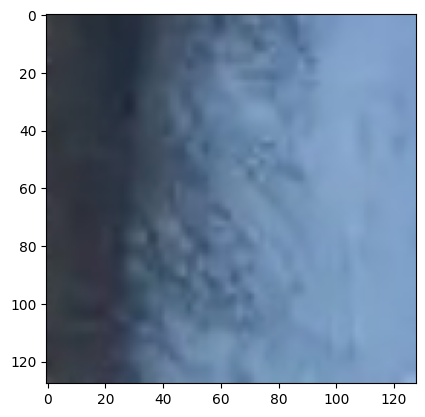

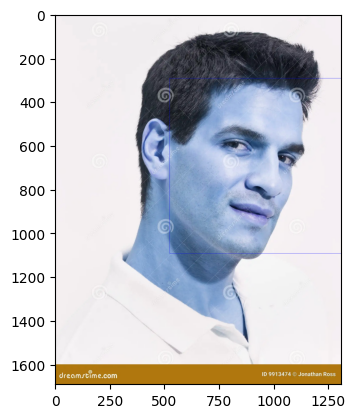

In [37]:
faces = frontalCascade.detectMultiScale(img,minNeighbors=1)
colors=[(0,0,255),(255,0,255),(0,255,0)]
#red,blue+red,green
#eyes,nose,mouth
#red,yellow,green
#blue face

for face in faces:
  X1,Y1,W,H = face
  X2,Y2 = X1+W,Y1+H

  factor = 0.15
  X1 = int(X1 - W/2*factor)
  Y1 = int(Y1 - H/2*factor)
  X2 = int(X2 + W/2*factor)
  Y2 = int(Y2 + H/2*factor)

  faceimg = img[Y1:Y2,X1:X2]
  if faceimg.size == 0: continue
  faceimg = cv2.resize(faceimg,(128,128))
  # cv2.rectangle(image,(X1,Y1),(X2,Y2),(255,0,0),2)

  FACE = image[Y1:Y2,X1:X2]
  FACE = cv2.resize(FACE,(128,128))
  plt.figure(1)
  plt.imshow(FACE)

  eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
  eyes = doubleeyes(eyes)

  if len(eyes) == 0:
    eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = frontaleyes(eyes)

    for eye in eyes:
      x1,y1,x2,y2 = eye
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[0],1)
  else:
    x1,y1,_,_ = eyes[0]
    _,_,x2,y2 = eyes[1]
    cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[0],1)

  if len(eyes) != 0:
    plt.figure(2)
    plt.imshow(FACE)
    #1.05
    noses = noseCascade.detectMultiScale(faceimg,1.02,minNeighbors=5)
    mouths = mouthCascade.detectMultiScale(faceimg,1.05,minNeighbors=5)
    noses = frontalnose(noses,eyes)
    mouths = frontalmouth(mouths,eyes)

    color = (0,0,255)
    if len(noses) == 0 and len(mouths) == 0:
      color = (0,255,0)

    if len(noses) != 0:
      x1,y1,x2,y2 = noses
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[1],1)
      plt.figure(3)
      plt.imshow(FACE)

    if len(mouths) != 0:
      x1,y1,x2,y2 = mouths
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[2],1)
      plt.figure(4)
      plt.imshow(FACE)

    cv2.rectangle(image,(X1,Y1),(X2,Y2),color,1)

plt.figure(5)
plt.imshow(image)

In [32]:
def doubleeyes(eyes):
  if len(eyes) == 0: return ()

  EYEX = (25,105)
  EYEY = (25,60)

  for eye in eyes:
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        return [[X1,Y1,X2,Y2],[X2,Y2,X2,Y2]]

  return ()

In [33]:
def frontaleyes(eyes):
  if len(eyes) == 0: return ()

  EYEX = (25,105)
  EYEY = (25,60)

  result = []
  for eye in eyes:
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        result.append([X1,Y1,X2,Y2])
        if len(result) == 2:
          return result

  return ()

In [34]:
def frontalnose(noses,eyes):
  if len(eyes) == 0 or len(noses) == 0: return ()

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  NOSEX = (-25,20)
  NOSEY = (55,90)

  for nose in noses:
    X1,Y1,W,H = nose
    X2,Y2 = X1+W,Y1+H
    nosepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if nosepoint[0]>=midx+NOSEX[0] and nosepoint[0]<=midx+NOSEX[1]:
      if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
        return X1,Y1,X2,Y2

  return ()

In [35]:
def frontalmouth(mouths,eyes):
  if len(eyes) == 0 or len(mouths) == 0: return ()

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  MOUTHX = (-40,30)
  MOUTHY = (90,122)

  for mouth in mouths:
    X1,Y1,W,H = mouth
    X2,Y2 = X1+W,Y1+H
    mouthpoint = ((X1+X2)//2,(Y1+Y2)//2)

    if mouthpoint[0]>=midx+MOUTHX[0] and mouthpoint[0]<=midx+MOUTHX[1]:
      if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
        return X1,Y1,X2,Y2

  return ()

# Complete on model face

In [55]:
import numpy as np
import cv2
from tqdm import tqdm

In [56]:
def doubleeyes(eyes,eyedetect):
  if len(eyes) == 0: return (),0

  EYEX = (25,105)
  EYEY = (20,60)

  eyedetect = -((eyedetect).flatten())
  idxs = np.argsort(eyedetect)
  eyes = eyes[idxs]
  # print(eyes,type(eyes))

  for i,eye in enumerate(eyes):
    # print(eye)
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        return [[X1,Y1,X2,Y2],[X2,Y2,X2,Y2]],eyedetect[idxs[i]]

  return (),0

In [57]:
def frontaleyes(eyes,eyedetect):
  if len(eyes) == 0: return (),[0,0]

  EYEX = (25,105)
  EYEY = (20,60)

  eyedetect = -(eyedetect.flatten())
  idxs = np.argsort(eyedetect)
  eyes = eyes[idxs]

  result = []
  resultdetect = []

  for i,eye in enumerate(eyes):
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        result.append([X1,Y1,X2,Y2])
        resultdetect.append(eyedetect[idxs[i]])

        if len(result) == 2:
          return result,resultdetect
          # m1x = (result[0][0]+result[0][2])//2
          # m2x = (result[1][0]+result[1][2])//2
          # if (m1x > 64 and m2x < 64) or (m1x < 64 and m2x > 64):
          #   return result

  return (),[0,0]

In [58]:
def frontalnose(noses,eyes,nosedetect):
  if len(noses) == 0: return (),0

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  # midy = (eye1[1] + eye2[3])//2
  NOSEX = (-25,20)
  NOSEY = (55,90)
  # NOSEY = (16,46)

  nosedetect = -((nosedetect).flatten())
  idxs = np.argsort(nosedetect)
  noses = noses[idxs]

  for i,nose in enumerate(noses):
    X1,Y1,W,H = nose
    X2,Y2 = X1+W,Y1+H
    nosepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if nosepoint[0]>=midx+NOSEX[0] and nosepoint[0]<=midx+NOSEX[1]:
      if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
        return [X1,Y1,X2,Y2],nosedetect[idxs[i]]

  return (),0

In [59]:
def frontalmouth(mouths,eyes,mouthdetect):
  if len(mouths) == 0: return (),0

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  # midy = (eye1[1] + eye2[3])//2
  MOUTHX = (-40,30)
  MOUTHY = (90,122)
  # MOUTHY = (48,83)

  mouthdetect = -((mouthdetect).flatten())
  idxs = np.argsort(mouthdetect)
  mouths = mouths[idxs]

  for i,mouth in enumerate(mouths):
    X1,Y1,W,H = mouth
    X2,Y2 = X1+W,Y1+H
    mouthpoint = ((X1+X2)//2,(Y1+Y2)//2)

    if mouthpoint[0]>=midx+MOUTHX[0] and mouthpoint[0]<=midx+MOUTHX[1]:
      if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
        return [X1,Y1,X2,Y2],mouthdetect[idxs[i]]

  return (),0

In [60]:
def profileeyes(eyes,eyedetect):
  if len(eyes) == 0: return ()

  # print(eyedetect)
  idxs = np.argsort((-eyedetect).flatten())
  # print(eyedetect)
  # print(eyedetect,type(eyedetect))
  # print(idxs)
  eyes = eyes[idxs]
  # print(eyes)

  for eye in eyes:
    x1,y1,w,h = eye
    x2,y2 = x1+w,y1+h
    eyespoint = ((x1+x2)//2,(y1+y2)//2)

    EYEX = (25,80)
    EYEY = (40,64)

    if eyespoint[1]>=EYEY[0] and eyespoint[1]<=EYEY[1]:
      if eyespoint[0]>=EYEX[0] and eyespoint[0]<=EYEX[1]:
        return x1,y1,x2,y2

  return ()

In [61]:
def profilenose(noses,eyes):
  if len(noses) == 0: return ()

  # NOSEY = (64,86)
  # NOSEX = (15,48)
  MNOSEX = (-30,0)
  NOSEY = (64,86)

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for nose in noses:
    x1,y1,w,h = nose
    x2,y2 = x1+w,y1+h
    nosepoint = ((x1+x2)//2,(y1+y2)//2)

    if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
      if nosepoint[0]>=X + MNOSEX[0] and nosepoint[0]<=X+MNOSEX[1]:
        return x1,y1,x2,y2

  return ()

In [62]:
def profilemouth(mouths,eyes):
  if len(mouths) == 0: return ()

  # MOUTHY = (86,110)
  # MOUTHX = (30,65)
  MMOUTHX = (-30,8)
  MOUTHY = (86,110)

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for mouth in mouths:
    x1,y1,w,h = mouth
    x2,y2 = x1+w,y1+h
    mouthpoint = ((x1+x2)//2,(y1+y2)//2)

    if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
      if mouthpoint[0]>=X+MMOUTHX[0] and mouthpoint[0]<=X+MMOUTHX[1]:
        return x1,y1,x2,y2

  return ()

In [80]:
def profileface(img,image):
  faces,detect = profileCascade.detectMultiScale2(img,1.01,minNeighbors=1)
  colors=[(0,0,255),(255,0,255),(0,255,0)]
  #red,blue+red,green
  #eyes,nose,mouth
  #red,yellow,green
  #blue face

  for face,d in zip(faces,detect):
    X1,Y1,W,H = face
    X2,Y2 = X1+W,Y1+H

    factor = 0.15
    X1 = int(X1 - W/2*factor)
    Y1 = int(Y1 - H/2*factor)
    X2 = int(X2 + W/2*factor)
    Y2 = int(Y2 + H/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))
    # cv2.rectangle(image,(X1,Y1),(X2,Y2),(255,0,0),2)

    FACE = image[Y1:Y2,X1:X2]
    FACE = cv2.resize(FACE,(128,128))
    # plt.imshow(FACE)

    eyes,eyedetect = doubleCascade.detectMultiScale2(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes,eyedetect)
    if len(eyes)!=0: continue

    eyes,eyedetect = eyesCascade.detectMultiScale2(faceimg,1.01,minNeighbors=3)
    eyes = profileeyes(eyes,eyedetect)

    if len(eyes) != 0:
      x1,y1,x2,y2 = eyes
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[0],1)
      # plt.imshow(FACE)

      noses = noseCascade.detectMultiScale(faceimg,1.03,minNeighbors=1)
      mouths = mouthCascade.detectMultiScale(faceimg,1.01,minNeighbors=1)
      noses = profilenose(noses,eyes)
      mouths = profilemouth(mouths,eyes)

      color = (0,0,255)
      if len(noses) == 0 and len(mouths) == 0:
        color = (0,255,0)

      if len(noses) != 0:
        x1,y1,x2,y2 = noses
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[1],1)
        # plt.imshow(FACE)

      if len(mouths) != 0:
        x1,y1,x2,y2 = mouths
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[2],1)
        # plt.imshow(FACE)

      plt.figure(1)
      plt.imshow(FACE)
      cv2.rectangle(image,(X1,Y1),(X2,Y2),color,1)
      cv2.putText(image,str(d[0]),(X1-10,Y1-10),cv2.FONT_HERSHEY_PLAIN,2,color,1)

In [82]:
def frontalface(img,image):
  faces,detect = frontalCascade.detectMultiScale2(img,1.01,minNeighbors=1)
  colors=[(0,0,255),(255,0,255),(0,255,0)]
  #red,blue+red,green
  #eyes,nose,mouth
  #red,yellow,green
  #blue face

  for face,d in zip(faces,detect):
    X1,Y1,W,H = face
    X2,Y2 = X1+W,Y1+H

    factor = 0.15
    X1 = int(X1 - W/2*factor)
    Y1 = int(Y1 - H/2*factor)
    X2 = int(X2 + W/2*factor)
    Y2 = int(Y2 + H/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))
    # cv2.rectangle(image,(X1,Y1),(X2,Y2),(255,0,0),2)

    FACE = image[Y1:Y2,X1:X2]
    FACE = cv2.resize(FACE,(128,128))
    # plt.imshow(FACE)

    eyes,doubledetect = doubleCascade.detectMultiScale2(faceimg,1.01,minNeighbors=5)
    eyes,eyevalue = doubleeyes(eyes,doubledetect)

    eyescore = 0

    if len(eyes) == 0:
      eyes,eyedetect = eyesCascade.detectMultiScale2(faceimg,1.01,minNeighbors=5)
      eyes,eyevalue = frontaleyes(eyes,eyedetect)
      eyescore = eyevalue[0]+eyevalue[1]

      for eye,value in zip(eyes,eyevalue):
        x1,y1,x2,y2 = eye
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[0],1)
        cv2.putText(FACE,str(value),(x1+10,y1+10),cv2.FONT_HERSHEY_PLAIN,1,colors[0],1)
    else:
      x1,y1,_,_ = eyes[0]
      _,_,x2,y2 = eyes[1]
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[0],1)
      cv2.putText(FACE,str(eyevalue),(x1-10,y1-10),cv2.FONT_HERSHEY_PLAIN,1,colors[0],1)
      eyescore = eyevalue

    if len(eyes) != 0:

      noses,nosedetect = noseCascade.detectMultiScale2(faceimg,1.02,minNeighbors=5)
      mouths,mouthdetect = mouthCascade.detectMultiScale2(faceimg,1.05,minNeighbors=5)
      noses,nosevalue = frontalnose(noses,eyes,nosedetect)
      mouths,mouthvalue = frontalmouth(mouths,eyes,mouthdetect)
      # print(mouths)

      score = eyescore + nosevalue + mouthvalue

      color = (0,0,255)
      if len(noses) == 0 or len(mouths) == 0:
        color = (0,255,0)

      if len(noses) != 0:
        x1,y1,x2,y2 = noses
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[1],1)
        cv2.putText(FACE,str(nosevalue),(x1-10,y1-10),cv2.FONT_HERSHEY_PLAIN,1,colors[1],1)
        # plt.imshow(FACE)

      if len(mouths) != 0:
        x1,y1,x2,y2 = mouths
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[2],1)
        cv2.putText(FACE,str(mouthvalue),(x1-10,y1-10),cv2.FONT_HERSHEY_PLAIN,1,colors[2],1)
        # plt.imshow(FACE)

      plt.figure(2)
      plt.imshow(FACE)
      cv2.rectangle(image,(X1,Y1),(X2,Y2),color,2)
      # cv2.putText(image,str(d[0]),(X1-10,Y1-10),cv2.FONT_HERSHEY_PLAIN,2,color,2)
      # cv2.putText(image,str(score+d[0]),(X1-10,Y1-10),cv2.FONT_HERSHEY_PLAIN,2,color,2)

In [83]:
cascadePath = './Weights/'

frontalCascade = cv2.CascadeClassifier(cascadePath + 'haarcascade_frontalface_alt2.xml')
profileCascade = cv2.CascadeClassifier(cascadePath + 'haarcascade_profileface.xml')

doubleCascade  =cv2.CascadeClassifier(cascadePath+'frontalEyes35x16.xml')
eyesCascade = cv2.CascadeClassifier(cascadePath+'haarcascadeoneeye.xml')

noseCascade = cv2.CascadeClassifier(cascadePath+'Nariz.xml')
mouthCascade = cv2.CascadeClassifier(cascadePath+'haarcascade_mcs_mouth.xml')

In [84]:
imgPath = './Images/'

IMAGE = cv2.imread(imgPath + 'img3.jpg')
# IMAGE = cv2.resize(IMAGE,(512,512))
image = IMAGE.copy()
img = cv2.cvtColor(IMAGE,cv2.COLOR_BGR2GRAY)

# plt.imshow(image)

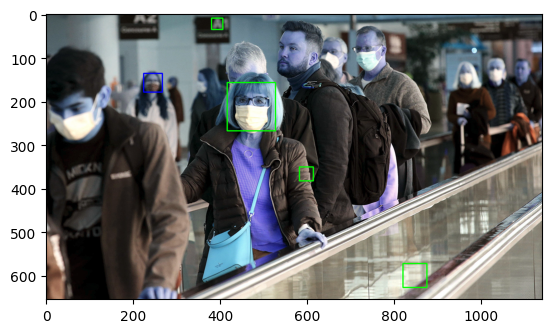

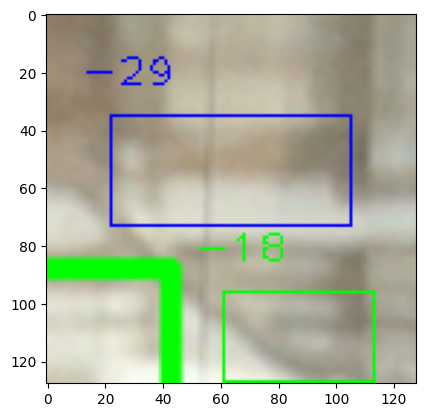

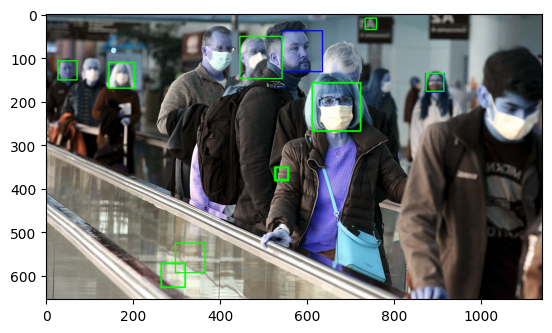

In [85]:
frontalface(img,image)
profileface(img,image)
plt.figure(3)
plt.imshow(image)

img = cv2.flip(img,1)
image = cv2.flip(image,1)

frontalface(img,image)
profileface(img,image)
plt.figure(4)
plt.imshow(image)

# IOU with NMS Experiment

In [ ]:
import cv2
from google.colab.patches import plt.imshow
import numpy as np
import itertools

In [ ]:
cascadePath = './drive/MyDrive/finalVersion/MODELS/HaarCascade'

frontalCascade = cv2.CascadeClassifier(cascadePath + '/haarcascade_frontalface_alt2.xml')
profileCascade = cv2.CascadeClassifier(cascadePath + '/haarcascade_profileface.xml')

doubleCascade  =cv2.CascadeClassifier(cascadePath+'/frontalEyes35x16.xml')
eyesCascade = cv2.CascadeClassifier(cascadePath+'/haarcascadeoneeye.xml')

noseCascade = cv2.CascadeClassifier(cascadePath+'/Nariz.xml')
mouthCascade = cv2.CascadeClassifier(cascadePath+'/haarcascade_mcs_mouth.xml')

In [ ]:
IMAGE = cv2.imread('full20.png')
image = IMAGE.copy()
img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# plt.imshow(image)

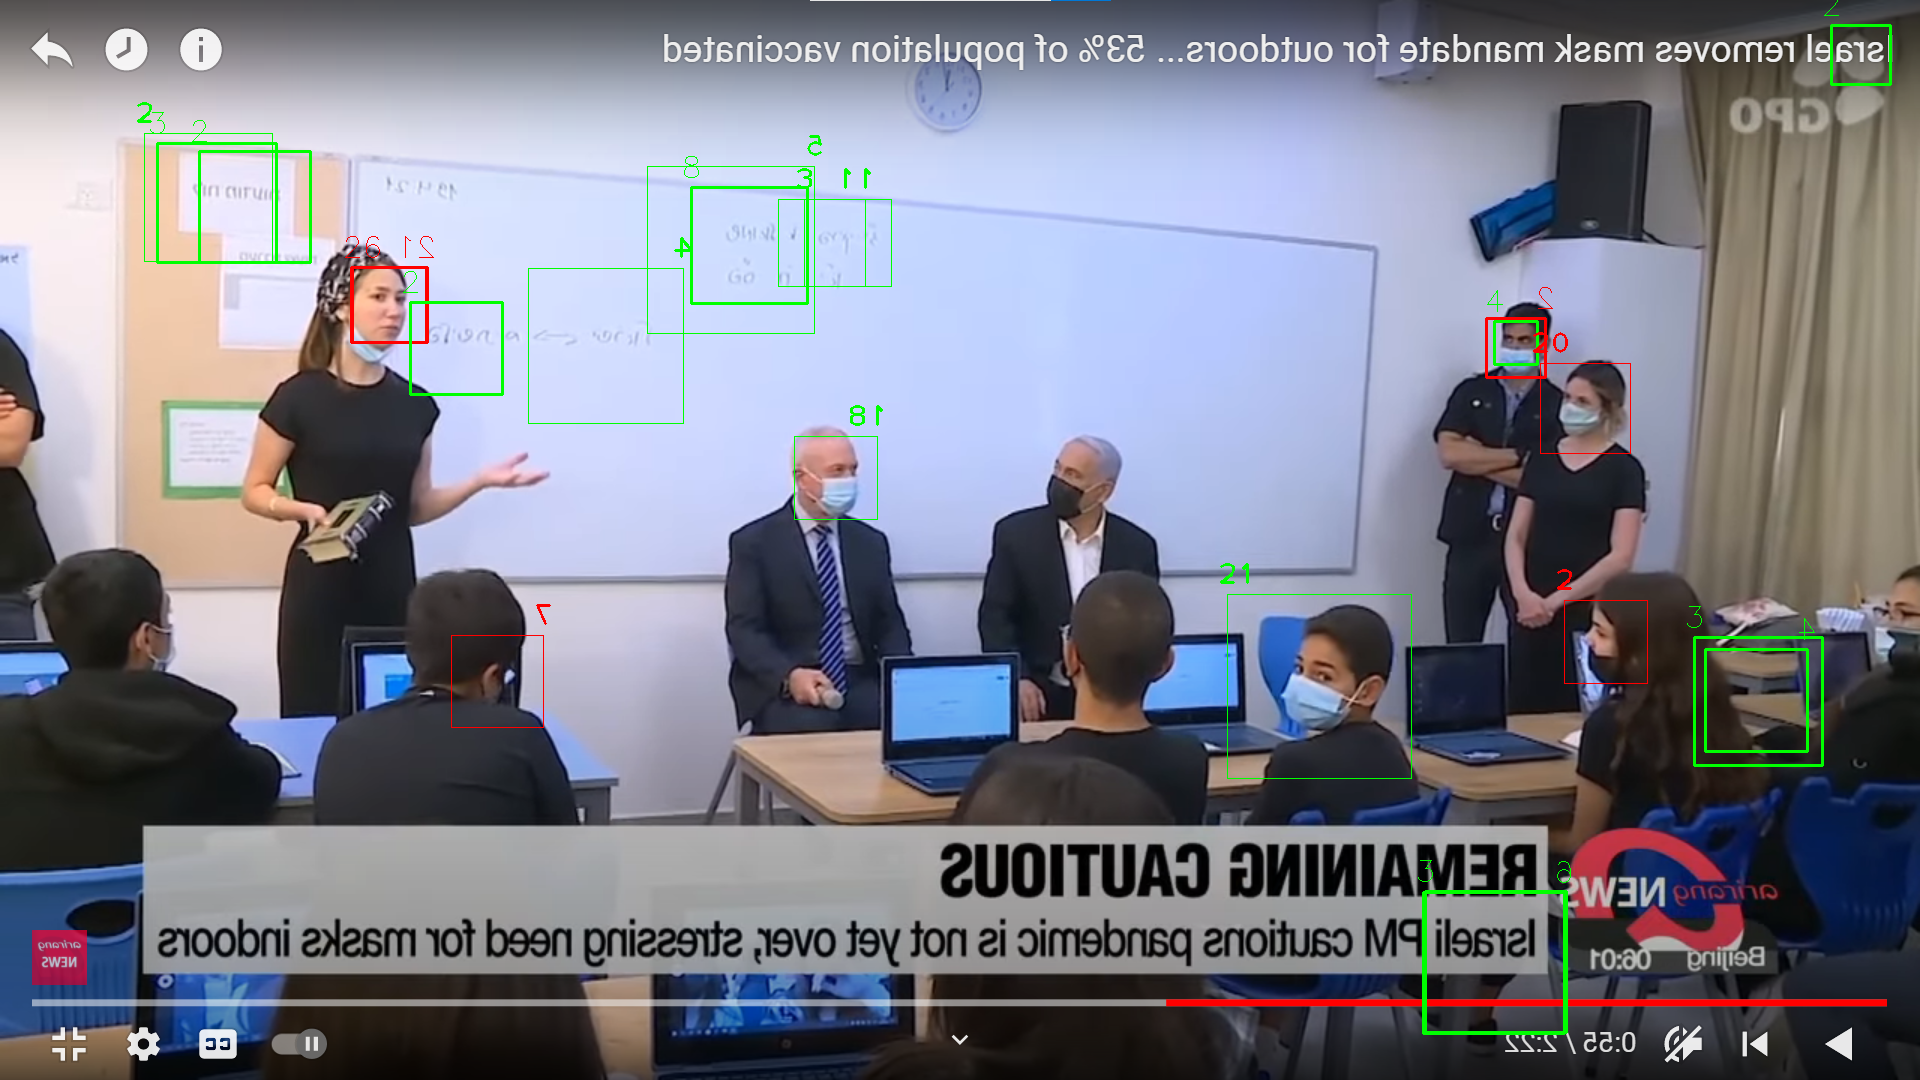

In [ ]:
face1,detect1,color1 = frontalface(img,image)
face2,detect2,color2 = profileface(img,image)
img = cv2.flip(img,1)
image = cv2.flip(image,1)
face3,detect3,color3 = frontalface(img,image,True)
face4,detect4,color4 = profileface(img,image,True)
plt.imshow(image)

In [ ]:
IMAGE = cv2.imread('full20.png')
image = IMAGE.copy()
# img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


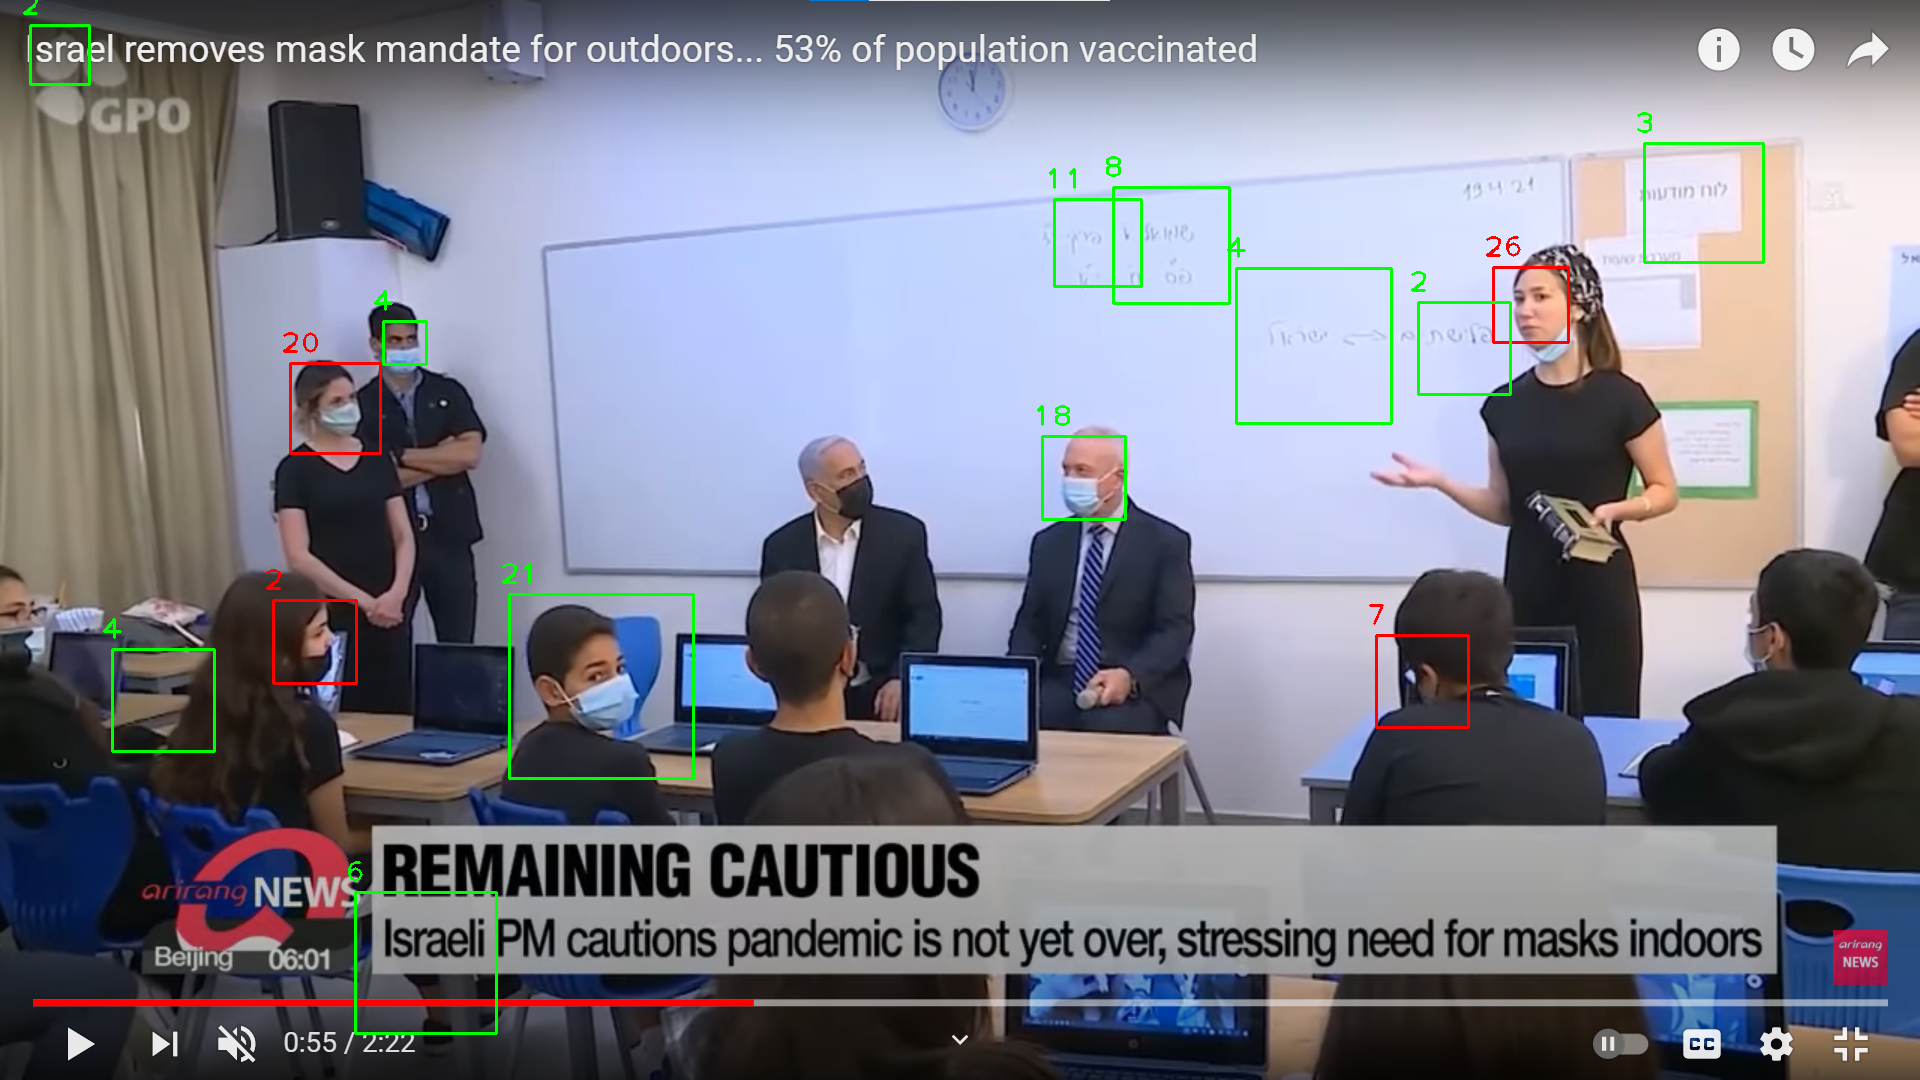

In [ ]:
faces = list(itertools.chain(*[face1,face2,face3,face4]))
detect = list(itertools.chain(*[detect1,detect2,detect3,detect4]))
# print(detect,faces)
colors = list(itertools.chain(*[color1,color2,color3,color4]))
faces = np.array(faces,dtype='int32')
detect = np.array(detect)
colors = np.array(colors)

new_faces,detect,colors = non_max_suppression_slow(faces,detect,colors,0.4)

# image = cv2.flip(image,1)

for face,value,color in zip(new_faces,detect,colors):
  X1,Y1,X2,Y2 = face
  color = color.tolist()

  # if value > 0:
  cv2.rectangle(image,(X1,Y1),(X2,Y2),color,2)
  cv2.putText(image,str(value),(X1-10,Y1-10),cv2.FONT_HERSHEY_PLAIN,2,color,2)
  # else:
  #   cv2.rectangle(image,(255-X1,Y1),(255-X2,Y2),color,2)
  #   cv2.putText(image,str(value[0]),(X1-10,Y1-10),cv2.FONT_HERSHEY_PLAIN,2,color,1)

plt.imshow(image)

In [ ]:
print('total faces',len(face1)+len(face2)+len(face3)+len(face4))

total faces 23


In [ ]:
print('remaining faces',len(new_faces))

remaining faces 15


In [ ]:
def frontalface(img,image,switch=False):
  faces,detect = frontalCascade.detectMultiScale2(img,minNeighbors=1)
  # faces,reject,weights = frontalCascade.detectMultiScale3(img,minNeighbors=1,outputRejectLevels=True)

  select_face = []
  select_detect = []
  select_color = []

  H,W,_ = image.shape

  # for face,r,w,d in zip(faces,reject,weights,detect):
  for face,d in zip(faces,detect):
    X1,Y1,w,h = face
    X2,Y2 = X1+w,Y1+h

    factor = 0.15
    X1 = int(X1 - w/2*factor)
    Y1 = int(Y1 - h/2*factor)
    X2 = int(X2 + w/2*factor)
    Y2 = int(Y2 + h/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)

    if len(eyes) == 0:
      eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      eyes = frontaleyes(eyes)
    else:
      x1,y1,_,_ = eyes[0]
      _,_,x2,y2 = eyes[1]

    if len(eyes) != 0:
      # plt.imshow(FACE)

      noses = noseCascade.detectMultiScale(faceimg,1.02,minNeighbors=5)
      mouths = mouthCascade.detectMultiScale(faceimg,1.05,minNeighbors=5)
      noses = frontalnose(noses,eyes)
      mouths = frontalmouth(mouths,eyes)

      color = (0,0,255)
      if len(noses) == 0 or len(mouths) == 0:
        color = (0,255,0)

      cv2.rectangle(image,(X1,Y1),(X2,Y2),color,2)
      cv2.putText(image,str(d[0]),(X1-10,Y1-10),cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,1,color,1)
      # print(d)
      # break
      if switch == True:
        select_face.append([W-X2,Y1,W-X1,Y2])
      else:
        select_face.append([X1,Y1,X2,Y2])

      select_detect.append(d[0])
      select_color.append(color)

  return select_face,select_detect,select_color

In [ ]:
def profileface(img,image,switch=False):
  faces,detect = profileCascade.detectMultiScale2(img,minNeighbors=1)

  select_face = []
  select_detect = []
  select_color = []

  H,W,_ = image.shape

  for face,d in zip(faces,detect):
    X1,Y1,w,h = face
    X2,Y2 = X1+w,Y1+h

    factor = 0.15
    X1 = int(X1 - w/2*factor)
    Y1 = int(Y1 - h/2*factor)
    X2 = int(X2 + w/2*factor)
    Y2 = int(Y2 + h/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)
    if len(eyes)!=0: continue

    eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=3)
    eyes = profileeyes(eyes)

    if len(eyes) != 0:

      noses = noseCascade.detectMultiScale(faceimg,1.03,minNeighbors=1)
      mouths = mouthCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      noses = profilenose(noses,eyes)
      mouths = profilemouth(mouths,eyes)

      color = (0,0,255)
      if len(noses) == 0 and len(mouths) == 0:
        color = (0,255,0)

      cv2.rectangle(image,(X1,Y1),(X2,Y2),color,1)
      cv2.putText(image,str(d[0]),(X1-10,Y1-10),cv2.FONT_HERSHEY_PLAIN,2,color,2)
      # print(d)

      if switch == True:
        select_face.append([W-X2,Y1,W-X1,Y2])
      else:
        select_face.append([X1,Y1,X2,Y2])

      select_detect.append(d[0])
      select_color.append(color)

  return select_face,select_detect,select_color

In [ ]:
def non_max_suppression_slow(boxes, detect, colors, overlapThresh):
  # if there are no boxes, return an empty list
  if len(boxes) == 0:
    return []
  # initialize the list of picked indexes
  pick = []
  # grab the coordinates of the bounding boxes
  x1 = boxes[:, 0]
  y1 = boxes[:, 1]
  x2 = boxes[:, 2]
  y2 = boxes[:, 3]
  # compute the area of the bounding boxes and sort the bounding
  # boxes by the bottom-right y-coordinate of the bounding box
  area = (x2 - x1 + 1) * (y2 - y1 + 1)
  # idxs = np.argsort(y2)
  idxs = np.argsort(detect)
  # detect = detect[idxs]
  # colors = colors[idxs]

  # keep looping while some indexes still remain in the indexes
  # list
  while len(idxs) > 0:
    # grab the last index in the indexes list, add the index
    # value to the list of picked indexes, then initialize
    # the suppression list (i.e. indexes that will be deleted)
    # using the last index
    last = len(idxs) - 1
    i = idxs[last]
    pick.append(i)
    suppress = [last]
    # loop over all indexes in the indexes list
    for pos in range(0, last):
      # grab the current index
      j = idxs[pos]
      # value = detect[pos]
      # find the largest (x, y) coordinates for the start of
      # the bounding box and the smallest (x, y) coordinates
      # for the end of the bounding box
      xx1 = max(x1[i], x1[j])
      yy1 = max(y1[i], y1[j])
      xx2 = min(x2[i], x2[j])
      yy2 = min(y2[i], y2[j])
      # compute the width and height of the bounding box
      w = max(0, xx2 - xx1 + 1)
      h = max(0, yy2 - yy1 + 1)
      # compute the ratio of overlap between the computed
      # bounding box and the bounding box in the area list
      overlap = float(w * h) / area[j]
      # if there is sufficient overlap, suppress the
      # current bounding box
      # score = value
      if overlap > overlapThresh:
        suppress.append(pos)
    # delete all indexes from the index list that are in the
    # suppression list
    idxs = np.delete(idxs, suppress)
  # return only the bounding boxes that were picked
  return boxes[pick],detect[pick],colors[pick]


# IOU with NMS detection score Video

In [ ]:
!pip3 install opencv-python==3.4.8.29

     |████████████████████████████████| 28.3MB 109kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
import cv2
from google.colab.patches import plt.imshow
import numpy as np
import itertools

In [ ]:
cascadePath = './drive/MyDrive/finalVersion/MODELS/HaarCascade'

frontalCascade = cv2.CascadeClassifier(cascadePath + '/haarcascade_frontalface_alt2.xml')
profileCascade = cv2.CascadeClassifier(cascadePath + '/haarcascade_profileface.xml')

doubleCascade  =cv2.CascadeClassifier(cascadePath+'/frontalEyes35x16.xml')
eyesCascade = cv2.CascadeClassifier(cascadePath+'/haarcascadeoneeye.xml')

noseCascade = cv2.CascadeClassifier(cascadePath+'/Nariz.xml')
mouthCascade = cv2.CascadeClassifier(cascadePath+'/haarcascade_mcs_mouth.xml')

In [ ]:
import cv2
import time
from tqdm.notebook import tqdm


video = cv2.VideoCapture('./drive/MyDrive/israel_part2.mp4')
# video = cv2.VideoCapture('./drive/MyDrive/israel_Trim.mp4')

frame_width = int(video.get(3))
frame_height = int(video.get(4))

size = (frame_width, frame_height)

indx = int(time.time())
result = cv2.VideoWriter(f'./drive/MyDrive/detection_output/output{indx}.avi',
                        cv2.VideoWriter_fourcc(*'MJPG'),
                        10, size)
print(indx)

start = time.time()
TIME = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
i=0
# USE_FRAMES = 2 # detect once in every _ frames
# ffaces1 = []
# ffaces2 = []
# pfaces1 = []
# pfaces2 = []

for j in tqdm(range(TIME)):
  ret, frame = video.read()
  image = frame.copy()
  img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

  # if i % USE_FRAMES == 0:
  #   ffaces1 = []
  #   pfaces1 = []
  #   ffaces2 = []
  #   pfaces2 = []

  face1,detect1,color1 = frontaldetect(img)
  face2,detect2,color2 = profiledetect(img)

  img = cv2.flip(img,1)

  face3,detect3,color3 = frontaldetect(img,True)
  face4,detect4,color4 = profiledetect(img,True)

  faces = list(itertools.chain(*[face1,face2,face3,face4]))
  detect = list(itertools.chain(*[detect1,detect2,detect3,detect4]))
  colors = list(itertools.chain(*[color1,color2,color3,color4]))

  faces = np.array(faces)
  detect = np.array(detect)
  colors = np.array(colors)

  pick = non_max_suppression_slow(faces,0.4)
  new_faces = faces[pick]
  detect = detect[pick]
  colors = colors[pick]

  for face,value,color in zip(new_faces,detect,colors):
    X1,Y1,X2,Y2 = face
    color = color.tolist()

    cv2.rectangle(image,(X1,Y1),(X2,Y2),color,2)
    cv2.putText(image,str(value),(X1-10,Y1-10),cv2.FONT_HERSHEY_PLAIN,2,color,2)

  result.write(image)
  i += 1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

end = time.time()
print('Average FPS: ',i/(end-start))

video.release()
result.release()
cv2.destroyAllWindows()

1625489063



Average FPS:  0.5205180941412811


In [ ]:

video.release()
result.release()
cv2.destroyAllWindows()

In [ ]:
def frontaldetect(img,switch=False):
  faces,detect = frontalCascade.detectMultiScale2(img,minNeighbors=2,minSize=(48,48),maxSize=(480,480))

  select_face = []
  select_detect = []
  select_color = []

  H,W = img.shape

  # for face,r,w,d in zip(faces,reject,weights,detect):
  for face,d in zip(faces,detect):
    X1,Y1,w,h = face
    X2,Y2 = X1+w,Y1+h

    factor = 0.15
    X1 = int(X1 - w/2*factor)
    Y1 = int(Y1 - h/2*factor)
    X2 = int(X2 + w/2*factor)
    Y2 = int(Y2 + h/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)

    if len(eyes) == 0:
      eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      eyes = frontaleyes(eyes)
    else:
      x1,y1,_,_ = eyes[0]
      _,_,x2,y2 = eyes[1]

    if len(eyes) != 0:

      noses = noseCascade.detectMultiScale(faceimg,1.02,minNeighbors=5)
      mouths = mouthCascade.detectMultiScale(faceimg,1.05,minNeighbors=5)
      noses = frontalnose(noses,eyes)
      mouths = frontalmouth(mouths,eyes)

      color = (0,0,255)
      if len(noses) == 0 or len(mouths) == 0:
        color = (0,255,0)

      if switch == True:
        select_face.append([W-X2,Y1,W-X1,Y2])
      else:
        select_face.append([X1,Y1,X2,Y2])

      select_detect.append(d[0])
      select_color.append(color)

  return select_face,select_detect,select_color

In [ ]:
def profiledetect(img,switch=False):
  faces,detect = profileCascade.detectMultiScale2(img,minNeighbors=2,minSize=(48,48),maxSize=(480,480))

  select_face = []
  select_detect = []
  select_color = []

  H,W = img.shape

  for face,d in zip(faces,detect):
    X1,Y1,w,h = face
    X2,Y2 = X1+w,Y1+h

    factor = 0.15
    X1 = int(X1 - w/2*factor)
    Y1 = int(Y1 - h/2*factor)
    X2 = int(X2 + w/2*factor)
    Y2 = int(Y2 + h/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)
    if len(eyes)!=0: continue

    eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=3)
    eyes = profileeyes(eyes)

    if len(eyes) != 0:

      noses = noseCascade.detectMultiScale(faceimg,1.03,minNeighbors=1)
      mouths = mouthCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      noses = profilenose(noses,eyes)
      mouths = profilemouth(mouths,eyes)

      color = (0,0,255)
      if len(noses) == 0 and len(mouths) == 0:
        color = (0,255,0)

      if switch == True:
        select_face.append([W-X2,Y1,W-X1,Y2])
      else:
        select_face.append([X1,Y1,X2,Y2])

      select_detect.append(d[0])
      select_color.append(color)

  return select_face,select_detect,select_color

In [ ]:
def non_max_suppression_slow(boxes, overlapThresh):

  if len(boxes) == 0:
    return []

  pick = []

  x1 = boxes[:, 0]
  y1 = boxes[:, 1]
  x2 = boxes[:, 2]
  y2 = boxes[:, 3]

  area = (x2 - x1 + 1) * (y2 - y1 + 1)

  idxs = np.argsort(detect)

  while len(idxs) > 0:

    last = len(idxs) - 1
    i = idxs[last]
    pick.append(i)
    suppress = [last]

    for pos in range(0, last):

      j = idxs[pos]

      xx1 = max(x1[i], x1[j])
      yy1 = max(y1[i], y1[j])
      xx2 = min(x2[i], x2[j])
      yy2 = min(y2[i], y2[j])

      w = max(0, xx2 - xx1 + 1)
      h = max(0, yy2 - yy1 + 1)

      overlap = (w * h) / area[j]

      if overlap > overlapThresh:
        suppress.append(pos)

    idxs = np.delete(idxs, suppress)

  return pick

In [ ]:
def doubleeyes(eyes):
  if len(eyes) == 0: return ()

  EYEX = (25,105)
  EYEY = (20,60)

  for eye in eyes:
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        return [[X1,Y1,X2,Y2],[X2,Y2,X2,Y2]]

  return ()

In [ ]:
def frontaleyes(eyes):
  if len(eyes) == 0: return ()

  EYEX = (25,105)
  EYEY = (20,60)

  result = []
  for eye in eyes:
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        result.append([X1,Y1,X2,Y2])
        if len(result) == 2:
          return result
          # m1x = (result[0][0]+result[0][2])//2
          # m2x = (result[1][0]+result[1][2])//2
          # if (m1x > 64 and m2x < 64) or (m1x < 64 and m2x > 64):
          #   return result

  return ()

In [ ]:
def frontalnose(noses,eyes):
  if len(eyes) == 0 or len(noses) == 0: return ()

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  # midy = (eye1[1] + eye2[3])//2
  NOSEX = (-25,20)
  NOSEY = (55,90)
  # NOSEY = (16,46)

  for nose in noses:
    X1,Y1,W,H = nose
    X2,Y2 = X1+W,Y1+H
    nosepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if nosepoint[0]>=midx+NOSEX[0] and nosepoint[0]<=midx+NOSEX[1]:
      if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
        return X1,Y1,X2,Y2

  return ()

In [ ]:
def frontalmouth(mouths,eyes):
  if len(eyes) == 0 or len(mouths) == 0: return ()

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  # midy = (eye1[1] + eye2[3])//2
  MOUTHX = (-40,30)
  MOUTHY = (90,122)
  # MOUTHY = (48,83)

  for mouth in mouths:
    X1,Y1,W,H = mouth
    X2,Y2 = X1+W,Y1+H
    mouthpoint = ((X1+X2)//2,(Y1+Y2)//2)

    if mouthpoint[0]>=midx+MOUTHX[0] and mouthpoint[0]<=midx+MOUTHX[1]:
      if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
        return X1,Y1,X2,Y2

  return ()

In [ ]:
def profileeyes(eyes):
  if len(eyes) == 0: return ()
  for eye in eyes:
    x1,y1,w,h = eye
    x2,y2 = x1+w,y1+h
    eyespoint = ((x1+x2)//2,(y1+y2)//2)

    EYEX = (25,80)
    EYEY = (40,64)

    if eyespoint[1]>=EYEY[0] and eyespoint[1]<=EYEY[1]:
      if eyespoint[0]>=EYEX[0] and eyespoint[0]<=EYEX[1]:
        return x1,y1,x2,y2

  return ()

In [ ]:
def profilenose(noses,eyes):
  if len(noses) == 0: return ()

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for nose in noses:
    x1,y1,w,h = nose
    x2,y2 = x1+w,y1+h
    nosepoint = ((x1+x2)//2,(y1+y2)//2)

    # NOSEY = (64,86)
    # NOSEX = (15,48)
    MNOSEX = (-30,0)
    NOSEY = (64,86)

    if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
      if nosepoint[0]>=X + MNOSEX[0] and nosepoint[0]<=X+MNOSEX[1]:
        return x1,y1,x2,y2

  return ()

In [ ]:
def profilemouth(mouths,eyes):
  if len(mouths) == 0: return ()

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for mouth in mouths:
    x1,y1,w,h = mouth
    x2,y2 = x1+w,y1+h
    mouthpoint = ((x1+x2)//2,(y1+y2)//2)

    # MOUTHY = (86,110)
    # MOUTHX = (30,65)
    MMOUTHX = (-30,8)
    MOUTHY = (86,110)

    if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
      if mouthpoint[0]>=X+MMOUTHX[0] and mouthpoint[0]<=X+MMOUTHX[1]:
        return x1,y1,x2,y2

  return ()

# IOU model

In [ ]:
!pip3 install opencv-python==3.4.8.29

In [ ]:
import cv2
from google.colab.patches import plt.imshow

In [ ]:
cascadePath = './drive/MyDrive/finalVersion/MODELS/HaarCascade'

frontalCascade = cv2.CascadeClassifier(cascadePath + '/haarcascade_frontalface_alt2.xml')
profileCascade = cv2.CascadeClassifier(cascadePath + '/haarcascade_profileface.xml')

doubleCascade  =cv2.CascadeClassifier(cascadePath+'/frontalEyes35x16.xml')
eyesCascade = cv2.CascadeClassifier(cascadePath+'/haarcascadeoneeye.xml')

noseCascade = cv2.CascadeClassifier(cascadePath+'/Nariz.xml')
mouthCascade = cv2.CascadeClassifier(cascadePath+'/haarcascade_mcs_mouth.xml')

In [ ]:
img = cv2.imread('no_mask_1400.jpg')
# img = cv2.resize(img,(720,720))
# img = cv2.medianBlur(img,31)
image = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# cv2.imwrite('photo.jpeg',img)
plt.imshow(image)
print(image.shape)

In [ ]:
import itertools

out1 = frontalface(img,image)
out2 = profileface(img,image)

img = cv2.flip(img,1)
image = cv2.flip(image,1)

out3 = frontalface(img,image,True)
out4 = profileface(img,image,True)

outs = list(itertools.chain(*[out1,out2,out3,out4]))
outs = {i:x for i,x in enumerate(outs)}

In [ ]:
outs

{0: [(1230, 345), (1256, 371), [1, 255, 0]],
 1: [(1015, 526), (1048, 559), [1, 255, 0]],
 2: [(260, 127), (309, 176), [1, 0, 255]],
 3: [(602, 136), (650, 184), [1, 0, 255]],
 4: [(87, 119), (130, 162), [1, 0, 255]],
 5: [(894, 75), (940, 121), [1, 255, 0]],
 6: [(448, 114), (502, 168), [1, 0, 255]],
 7: [(410, 125), (461, 176), [1, 0, 255]],
 8: [(1019, 61), (1069, 111), [1, 255, 0]],
 9: [(720, 73), (774, 127), [1, 0, 255]],
 10: [(366, 136), (421, 191), [1, 255, 0]],
 11: [(42, 12), (94, 64), [1, 255, 0]],
 12: [(1014, 386), (1097, 469), [100, 255, 0]],
 13: [(144, 0), (168, 24), [-1, 255, 0]],
 14: [(679, 505), (708, 534), [-1, 255, 0]],
 15: [(1090, 127), (1139, 176), [-1, 0, 255]],
 16: [(897, 114), (951, 168), [-1, 0, 255]],
 17: [(1269, 118), (1313, 162), [-1, 0, 255]],
 18: [(461, 76), (503, 118), [-1, 255, 0]],
 19: [(750, 137), (796, 183), [-1, 0, 255]],
 20: [(939, 125), (989, 175), [-1, 0, 255]],
 21: [(332, 63), (378, 109), [-1, 255, 0]],
 22: [(624, 73), (679, 128), [-1

In [ ]:
final_box = outs.copy()
length = len(outs)

for i in range(length):
  P1, P2, C1 = outs[i]

  for j in range(i,length):
    if i == j: continue

    p1, p2, C2 = outs[j]
    iou = get_iou((p1,p2),(P1,P2))

    if iou >= 0.6:
      if C1[0] == 100 or C1[0] == -100: final_box.pop(i)
      elif C2[0] == 100 or C2[0] == -100: final_box.pop(j)
      else: final_box.pop(j)
      # outs.pop(j)


In [ ]:
final_box

In [ ]:
# image = cv2.flip(image,1)
for box in final_box.values():
  (x1,y1),(x2,y2),color = box
  if color[0] > 0:
    x1 = image.shape[1] - x1
    x2 = image.shape[1] - x2
  else:
    color[0] *= -1
  cv2.rectangle(image,(x1,y1),(x2,y2),color,2)

plt.imshow(image)

In [ ]:
def get_iou(bb1, bb2):
  (x1,y1),(x2,y2) = bb1
  (X1,Y1),(X2,Y2) = bb2

  assert x1 <= x2
  assert y1 <= y2
  assert X1 <= X2
  assert Y1 <= Y2

  x_left = max(x1, X1)
  y_top = max(y1, Y1)
  x_right = min(x2, X2)
  y_bottom = min(y2, Y2)

  if x_right < x_left or y_bottom < y_top:
      return 0.0

  intersection_area = (x_right - x_left + 1) * (y_bottom - y_top + 1)

  # compute the area of both AABBs
  bb1_area = (x2 - x1 + 1) * (y2 - y1 + 1)
  bb2_area = (X2 - X1 + 1) * (Y2 - Y1 + 1)
  iou = intersection_area / float(bb1_area + bb2_area - intersection_area)

  assert iou >= 0.0
  assert iou <= 1.0

  return iou

In [ ]:
def frontalface(img,image,flip=False):
  faces = frontalCascade.detectMultiScale(img,minNeighbors=1)
  colors=[(0,0,255),(255,0,255),(0,255,0)]
  #red,blue+red,green
  #eyes,nose,mouth
  #red,yellow,green
  #blue face
  outs = []

  for face in faces:
    X1,Y1,W,H = face
    X2,Y2 = X1+W,Y1+H

    factor = 0.15
    X1 = int(X1 - W/2*factor)
    Y1 = int(Y1 - H/2*factor)
    X2 = int(X2 + W/2*factor)
    Y2 = int(Y2 + H/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))
    # cv2.rectangle(image,(X1,Y1),(X2,Y2),(255,0,0),2)

    FACE = image[Y1:Y2,X1:X2]
    FACE = cv2.resize(FACE,(128,128))
    # plt.imshow(FACE)

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)

    if len(eyes) == 0:
      eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      eyes = frontaleyes(eyes)

      for eye in eyes:
        x1,y1,x2,y2 = eye
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[0],1)
    else:
      x1,y1,_,_ = eyes[0]
      _,_,x2,y2 = eyes[1]
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[0],1)

    if len(eyes) != 0:

      # plt.imshow(FACE)

      noses = noseCascade.detectMultiScale(faceimg,1.02,minNeighbors=5)
      mouths = mouthCascade.detectMultiScale(faceimg,1.05,minNeighbors=5)
      noses = frontalnose(noses,eyes)
      mouths = frontalmouth(mouths,eyes)
      # print(mouths)

      color = [1,0,255]
      if len(noses) == 0 or len(mouths) == 0:
        color = [1,255,0]

      if len(noses) != 0:
        x1,y1,x2,y2 = noses
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[1],1)
        # plt.imshow(FACE)

      if len(mouths) != 0:
        x1,y1,x2,y2 = mouths
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[2],1)
        # plt.imshow(FACE)

      plt.imshow(FACE)
      # cv2.rectangle(image,(X1,Y1),(X2,Y2),color,2)
      if flip == True:
        color[0] *= -1
      outs.append([(X1,Y1),(X2,Y2),color])

  return outs

In [ ]:
def profileface(img,image,flip=False):
  faces = profileCascade.detectMultiScale(img,minNeighbors=1)
  colors=[(0,0,255),(255,0,255),(0,255,0)]
  #red,blue+red,green
  #eyes,nose,mouth
  #red,yellow,green
  #blue face
  outs = []

  for face in faces:
    X1,Y1,W,H = face
    X2,Y2 = X1+W,Y1+H

    factor = 0.15
    X1 = int(X1 - W/2*factor)
    Y1 = int(Y1 - H/2*factor)
    X2 = int(X2 + W/2*factor)
    Y2 = int(Y2 + H/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))
    # cv2.rectangle(image,(X1,Y1),(X2,Y2),(255,0,0),2)

    FACE = image[Y1:Y2,X1:X2]
    FACE = cv2.resize(FACE,(128,128))
    # plt.imshow(FACE)

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)
    if len(eyes)!=0: continue

    eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=3)
    eyes = profileeyes(eyes)

    if len(eyes) != 0:
      x1,y1,x2,y2 = eyes
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[0],1)
      # plt.imshow(FACE)

      noses = noseCascade.detectMultiScale(faceimg,1.03,minNeighbors=1)
      mouths = mouthCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      noses = profilenose(noses,eyes)
      mouths = profilemouth(mouths,eyes)

      color = [100,0,255]
      if len(noses) == 0 and len(mouths) == 0:
        color = [100,255,0]

      if len(noses) != 0:
        x1,y1,x2,y2 = noses
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[1],1)
        # plt.imshow(FACE)

      if len(mouths) != 0:
        x1,y1,x2,y2 = mouths
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colors[2],1)
        # plt.imshow(FACE)

      plt.imshow(FACE)
      # cv2.rectangle(image,(X1,Y1),(X2,Y2),color,1)
      if flip == True:
        color[0] *= -1
      outs.append([(X1,Y1),(X2,Y2),color])

  return outs

In [ ]:
def profileeyes(eyes):
  if len(eyes) == 0: return ()
  for eye in eyes:
    x1,y1,w,h = eye
    x2,y2 = x1+w,y1+h
    eyespoint = ((x1+x2)//2,(y1+y2)//2)

    # EYEY = (40,64)
    # EYEX = (20,80)
    EYEX = (25,80)
    EYEY = (40,64)

    if eyespoint[1]>=EYEY[0] and eyespoint[1]<=EYEY[1]:
      if eyespoint[0]>=EYEX[0] and eyespoint[0]<=EYEX[1]:
        return x1,y1,x2,y2

  return ()

In [ ]:
def profilenose(noses,eyes):
  if len(noses) == 0: return ()

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for nose in noses:
    x1,y1,w,h = nose
    x2,y2 = x1+w,y1+h
    nosepoint = ((x1+x2)//2,(y1+y2)//2)

    # NOSEY = (64,86)
    # NOSEX = (15,48)
    MNOSEX = (-30,0)
    NOSEY = (64,86)

    if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
      if nosepoint[0]>=X + MNOSEX[0] and nosepoint[0]<=X+MNOSEX[1]:
        return x1,y1,x2,y2

  return ()

In [ ]:
def profilemouth(mouths,eyes):
  if len(mouths) == 0: return ()

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for mouth in mouths:
    x1,y1,w,h = mouth
    x2,y2 = x1+w,y1+h
    mouthpoint = ((x1+x2)//2,(y1+y2)//2)

    # MOUTHY = (86,110)
    # MOUTHX = (30,65)
    MMOUTHX = (-30,8)
    MOUTHY = (86,110)

    if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
      if mouthpoint[0]>=X+MMOUTHX[0] and mouthpoint[0]<=X+MMOUTHX[1]:
        return x1,y1,x2,y2

  return ()

In [ ]:
def doubleeyes(eyes):
  if len(eyes) == 0: return ()

  EYEX = (25,105)
  EYEY = (25,60)

  for eye in eyes:
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        return [[X1,Y1,X2,Y2],[X2,Y2,X2,Y2]]

  return ()

In [ ]:
def frontaleyes(eyes):
  if len(eyes) == 0: return ()

  EYEX = (25,105)
  EYEY = (25,60)

  result = []
  for eye in eyes:
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        result.append([X1,Y1,X2,Y2])
        if len(result) == 2:
          return result

  return ()

In [ ]:
def frontalnose(noses,eyes):
  if len(eyes) == 0 or len(noses) == 0: return ()

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  NOSEX = (-25,20)
  NOSEY = (55,90)

  for nose in noses:
    X1,Y1,W,H = nose
    X2,Y2 = X1+W,Y1+H
    nosepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if nosepoint[0]>=midx+NOSEX[0] and nosepoint[0]<=midx+NOSEX[1]:
      if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
        return X1,Y1,X2,Y2

  return ()

In [ ]:
def frontalmouth(mouths,eyes):
  if len(eyes) == 0 or len(mouths) == 0: return ()

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  MOUTHX = (-40,30)
  MOUTHY = (90,122)

  for mouth in mouths:
    X1,Y1,W,H = mouth
    X2,Y2 = X1+W,Y1+H
    mouthpoint = ((X1+X2)//2,(Y1+Y2)//2)

    if mouthpoint[0]>=midx+MOUTHX[0] and mouthpoint[0]<=midx+MOUTHX[1]:
      if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
        return X1,Y1,X2,Y2

  return ()

# IOU Video

In [ ]:
def frontaldetect(img,flip=False):
  faces = frontalCascade.detectMultiScale(img,minNeighbors=2,minSize=(32,32),maxSize=(480,480))

  outs = []

  for face in faces:
    X1,Y1,W,H = face
    X2,Y2 = X1+W,Y1+H

    factor = 0.15
    X1 = int(X1 - W/2*factor)
    Y1 = int(Y1 - H/2*factor)
    X2 = int(X2 + W/2*factor)
    Y2 = int(Y2 + H/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)

    if len(eyes) == 0:
      eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      eyes = frontaleyes(eyes)

    else:
      x1,y1,_,_ = eyes[0]
      _,_,x2,y2 = eyes[1]

    if len(eyes) != 0:

      noses = noseCascade.detectMultiScale(faceimg,1.02,minNeighbors=5)
      mouths = mouthCascade.detectMultiScale(faceimg,1.05,minNeighbors=5)
      noses = frontalnose(noses,eyes)
      mouths = frontalmouth(mouths,eyes)

      color = [1,0,255]
      if len(noses) == 0 or len(mouths) == 0:
        color = [1,255,0]

      if flip == True:
        color[0] *= -1
      outs.append([(X1,Y1),(X2,Y2),color])

  return outs

In [ ]:
def profiledetect(img,flip=False):
  faces = profileCascade.detectMultiScale(img,minNeighbors=2,minSize=(32,32),maxSize=(480,480))

  outs = []

  for face in faces:
    X1,Y1,W,H = face
    X2,Y2 = X1+W,Y1+H

    factor = 0.15
    X1 = int(X1 - W/2*factor)
    Y1 = int(Y1 - H/2*factor)
    X2 = int(X2 + W/2*factor)
    Y2 = int(Y2 + H/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)
    if len(eyes)!=0: continue

    eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=3)
    eyes = profileeyes(eyes)

    if len(eyes) != 0:
      x1,y1,x2,y2 = eyes

      noses = noseCascade.detectMultiScale(faceimg,1.03,minNeighbors=1)
      mouths = mouthCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      noses = profilenose(noses,eyes)
      mouths = profilemouth(mouths,eyes)

      color = [100,0,255]
      if len(noses) == 0 and len(mouths) == 0:
        color = [100,255,0]

      if flip == True:
        color[0] *= -1
      outs.append([(X1,Y1),(X2,Y2),color])

  return outs

In [ ]:
def remover(outs,image):
  final_box = outs.copy()
  length = len(outs)

  for i in range(length):
    P1, P2, C1 = outs[i]

    for j in range(i,length):
      if i == j: continue

      p1, p2, C2 = outs[j]
      iou = get_iou((p1,p2),(P1,P2))

      if iou >= 0.6:
        if C1[0] == 100 or C1[0] == -100: final_box.pop(i)
        elif C2[0] == 100 or C2[0] == -100: final_box.pop(j)
        else: final_box.pop(j)

  image = cv2.flip(image,1)

  for box in final_box.values():
    (x1,y1),(x2,y2),color = box
    if color[0] > 0:
      x1 = image.shape[1] - x1
      x2 = image.shape[1] - x2
    else:
      color[0] *= -1

    cv2.rectangle(image,(x1,y1),(x2,y2),color,2)

In [ ]:
import cv2
import time
from tqdm.notebook import tqdm


# video = cv2.VideoCapture('./drive/MyDrive/israel_part1.mp4')
video = cv2.VideoCapture('./drive/MyDrive/israel_Trim.mp4')

frame_width = int(video.get(3))
frame_height = int(video.get(4))

size = (frame_width, frame_height)

indx = int(time.time())
result = cv2.VideoWriter(f'./drive/MyDrive/detection_output/output{indx}.avi',
                        cv2.VideoWriter_fourcc(*'MJPG'),
                        10, size)
print(indx)

start = time.time()
TIME = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
i=0
# USE_FRAMES = 2 # detect once in every _ frames
# ffaces1 = []
# ffaces2 = []
# pfaces1 = []
# pfaces2 = []

for j in tqdm(range(TIME)):
  ret, frame = video.read()
  img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  image = frame.copy()

  # if i % USE_FRAMES == 0:
  #   ffaces1 = []
  #   pfaces1 = []
  #   ffaces2 = []
  #   pfaces2 = []

  ffaces1 = frontaldetect(img)
  pfaces1 = profiledetect(img)

  img = cv2.flip(img,1)
  image = cv2.flip(image,1)

  ffaces2 = frontaldetect(img,True)
  pfaces2 = profiledetect(img,True)

  outs = list(itertools.chain(*[ffaces1,pfaces1,ffaces2,pfaces2]))
  outs = {i:x for i,x in enumerate(outs)}

  remover(outs,image)

  result.write(image)
  i += 1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

end = time.time()
print('Average FPS: ',i/(end-start))

video.release()
result.release()
cv2.destroyAllWindows()

In [ ]:
video.release()
result.release()
cv2.destroyAllWindows()

# Older Video

In [ ]:
import cv2
from google.colab.patches import plt.imshow
import os
import time

In [ ]:
cascadePath = './drive/MyDrive/finalVersion/MODELS/HaarCascade'

frontalCascade = cv2.CascadeClassifier(cascadePath + '/haarcascade_frontalface_alt2.xml')
profileCascade = cv2.CascadeClassifier(cascadePath + '/haarcascade_profileface.xml')

doubleCascade  =cv2.CascadeClassifier(cascadePath+'/frontalEyes35x16.xml')
eyesCascade = cv2.CascadeClassifier(cascadePath+'/haarcascadeoneeye.xml')

noseCascade = cv2.CascadeClassifier(cascadePath+'/Nariz.xml')
mouthCascade = cv2.CascadeClassifier(cascadePath+'/haarcascade_mcs_mouth.xml')

In [ ]:
def profileeyes(eyes):
  if len(eyes) == 0: return ()
  for eye in eyes:
    x1,y1,w,h = eye
    x2,y2 = x1+w,y1+h
    eyespoint = ((x1+x2)//2,(y1+y2)//2)

    # EYEY = (40,64)
    # EYEX = (20,80)
    EYEX = (25,80)
    EYEY = (40,64)

    if eyespoint[1]>=EYEY[0] and eyespoint[1]<=EYEY[1]:
      if eyespoint[0]>=EYEX[0] and eyespoint[0]<=EYEX[1]:
        return x1,y1,x2,y2

  return ()

In [ ]:
def profilenose(noses,eyes):
  if len(noses) == 0: return ()

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for nose in noses:
    x1,y1,w,h = nose
    x2,y2 = x1+w,y1+h
    nosepoint = ((x1+x2)//2,(y1+y2)//2)

    # NOSEY = (64,86)
    # NOSEX = (15,48)
    MNOSEX = (-30,0)
    NOSEY = (64,86)

    if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
      if nosepoint[0]>=X + MNOSEX[0] and nosepoint[0]<=X+MNOSEX[1]:
        return x1,y1,x2,y2

  return ()

In [ ]:
def profilemouth(mouths,eyes):
  if len(mouths) == 0: return ()

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for mouth in mouths:
    x1,y1,w,h = mouth
    x2,y2 = x1+w,y1+h
    mouthpoint = ((x1+x2)//2,(y1+y2)//2)

    # MOUTHY = (86,110)
    # MOUTHX = (30,65)
    MMOUTHX = (-30,8)
    MOUTHY = (86,110)

    if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
      if mouthpoint[0]>=X+MMOUTHX[0] and mouthpoint[0]<=X+MMOUTHX[1]:
        return x1,y1,x2,y2

  return ()

In [ ]:
def doubleeyes(eyes):
  if len(eyes) == 0: return ()

  EYEX = (25,105)
  EYEY = (10,60)

  for eye in eyes:
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        return [[X1,Y1,X2,Y2],[X2,Y2,X2,Y2]]

  return ()

In [ ]:
def frontaleyes(eyes):
  if len(eyes) == 0: return ()

  EYEX = (25,105)
  EYEY = (10,60)

  result = []
  for eye in eyes:
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        result.append([X1,Y1,X2,Y2])
        if len(result) == 2:
          return result

  return ()

In [ ]:
def frontalnose(noses,eyes):
  if len(eyes) == 0 or len(noses) == 0: return ()

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  NOSEX = (-25,20)
  NOSEY = (55,90)

  for nose in noses:
    X1,Y1,W,H = nose
    X2,Y2 = X1+W,Y1+H
    nosepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if nosepoint[0]>=midx+NOSEX[0] and nosepoint[0]<=midx+NOSEX[1]:
      if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
        return X1,Y1,X2,Y2

  return ()

In [ ]:
def frontalmouth(mouths,eyes):
  if len(eyes) == 0 or len(mouths) == 0: return ()

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  MOUTHX = (-40,30)
  MOUTHY = (90,122)

  for mouth in mouths:
    X1,Y1,W,H = mouth
    X2,Y2 = X1+W,Y1+H
    mouthpoint = ((X1+X2)//2,(Y1+Y2)//2)

    if mouthpoint[0]>=midx+MOUTHX[0] and mouthpoint[0]<=midx+MOUTHX[1]:
      if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
        return X1,Y1,X2,Y2

  return ()

In [ ]:
def frontalface(img,image):
  faces = frontalCascade.detectMultiScale(img,minNeighbors=1,minSize=(32,32),maxSize=(256,256))

  for face in faces:
    X1,Y1,W,H = face
    X2,Y2 = X1+W,Y1+H

    factor = 0.15
    X1 = int(X1 - W/2*factor)
    Y1 = int(Y1 - H/2*factor)
    X2 = int(X2 + W/2*factor)
    Y2 = int(Y2 + H/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)

    if len(eyes) == 0:
      eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      eyes = frontaleyes(eyes)
    else:
      x1,y1,_,_ = eyes[0]
      _,_,x2,y2 = eyes[1]

    if len(eyes) != 0:
      # plt.imshow(FACE)

      noses = noseCascade.detectMultiScale(faceimg,1.02,minNeighbors=5)
      mouths = mouthCascade.detectMultiScale(faceimg,1.05,minNeighbors=5)
      noses = frontalnose(noses,eyes)
      mouths = frontalmouth(mouths,eyes)

      color = (0,0,255)
      if len(noses) == 0 or len(mouths) == 0:
        color = (0,255,0)

      cv2.rectangle(image,(X1,Y1),(X2,Y2),color,2)

In [ ]:
def profileface(img,image):
  faces = profileCascade.detectMultiScale(img,minNeighbors=1,minSize=(32,32),maxSize=(256,256))

  for face in faces:
    X1,Y1,W,H = face
    X2,Y2 = X1+W,Y1+H

    factor = 0.15
    X1 = int(X1 - W/2*factor)
    Y1 = int(Y1 - H/2*factor)
    X2 = int(X2 + W/2*factor)
    Y2 = int(Y2 + H/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)
    if len(eyes)!=0: continue

    eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=3)
    eyes = profileeyes(eyes)

    if len(eyes) != 0:

      noses = noseCascade.detectMultiScale(faceimg,1.03,minNeighbors=1)
      mouths = mouthCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      noses = profilenose(noses,eyes)
      mouths = profilemouth(mouths,eyes)

      color = (0,0,255)
      if len(noses) == 0 and len(mouths) == 0:
        color = (0,255,0)

      cv2.rectangle(image,(X1,Y1),(X2,Y2),color,1)

In [ ]:
import cv2
import time
from tqdm.notebook import tqdm


# video = cv2.VideoCapture('./drive/MyDrive/israel_part1.mp4')
video = cv2.VideoCapture('./drive/MyDrive/maskes.mp4')

frame_width = int(video.get(3))
frame_height = int(video.get(4))

size = (frame_width, frame_height)

indx = int(time.time())
result = cv2.VideoWriter(f'./drive/MyDrive/detection_output/output{indx}.avi',
                        cv2.VideoWriter_fourcc(*'MJPG'),
                        10, size)
print(indx)

start = time.time()
TIME = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
i=0

for j in tqdm(range(TIME)):
  ret, frame = video.read()
  img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  image = frame.copy()

  frontalface(img,image)
  profileface(img,image)

  img = cv2.flip(img,1)
  image = cv2.flip(image,1)

  frontalface(img,image)
  profileface(img,image)

  result.write(image)
  i += 1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

end = time.time()
print('Average FPS: ',i/(end-start))

video.release()
result.release()
cv2.destroyAllWindows()

1623596526


KeyboardInterrupt: ignored

# Faster Video here

In [ ]:
def frontalface(img,image,faces):
  if len(faces) == 0:
    faces = frontalCascade.detectMultiScale(img,minNeighbors=2,minSize=(32,32),maxSize=(256,256))

  for face in faces:
    X1,Y1,W,H = face
    X2,Y2 = X1+W,Y1+H

    factor = 0.15
    X1 = int(X1 - W/2*factor)
    Y1 = int(Y1 - H/2*factor)
    X2 = int(X2 + W/2*factor)
    Y2 = int(Y2 + H/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)

    if len(eyes) == 0:
      eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      eyes = frontaleyes(eyes)
    else:
      x1,y1,_,_ = eyes[0]
      _,_,x2,y2 = eyes[1]

    if len(eyes) != 0:
      # plt.imshow(FACE)

      noses = noseCascade.detectMultiScale(faceimg,1.02,minNeighbors=5)
      mouths = mouthCascade.detectMultiScale(faceimg,1.05,minNeighbors=5)
      noses = frontalnose(noses,eyes)
      mouths = frontalmouth(mouths,eyes)

      color = (0,0,255)
      if len(noses) == 0 or len(mouths) == 0:
        color = (0,255,0)

      cv2.rectangle(image,(X1,Y1),(X2,Y2),color,2)

  return faces

In [ ]:
def profileface(img,image,faces):
  if len(faces) == 0:
    faces = profileCascade.detectMultiScale(img,minNeighbors=2,minSize=(32,32),maxSize=(256,256))

  for face in faces:
    X1,Y1,W,H = face
    X2,Y2 = X1+W,Y1+H

    factor = 0.15
    X1 = int(X1 - W/2*factor)
    Y1 = int(Y1 - H/2*factor)
    X2 = int(X2 + W/2*factor)
    Y2 = int(Y2 + H/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    eyes = doubleCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
    eyes = doubleeyes(eyes)
    if len(eyes)!=0: continue

    eyes = eyesCascade.detectMultiScale(faceimg,1.01,minNeighbors=3)
    eyes = profileeyes(eyes)

    if len(eyes) != 0:

      noses = noseCascade.detectMultiScale(faceimg,1.03,minNeighbors=1)
      mouths = mouthCascade.detectMultiScale(faceimg,1.01,minNeighbors=5)
      noses = profilenose(noses,eyes)
      mouths = profilemouth(mouths,eyes)

      color = (0,0,255)
      if len(noses) == 0 and len(mouths) == 0:
        color = (0,255,0)

      cv2.rectangle(image,(X1,Y1),(X2,Y2),color,1)

  return faces

In [ ]:
import cv2
import time
from tqdm.notebook import tqdm


# video = cv2.VideoCapture('./drive/MyDrive/israel_part1.mp4')
video = cv2.VideoCapture('./drive/MyDrive/israel_part2.mp4')

frame_width = int(video.get(3))
frame_height = int(video.get(4))

size = (frame_width, frame_height)

indx = int(time.time())
result = cv2.VideoWriter(f'./drive/MyDrive/detection_output/output{indx}.avi',
                        cv2.VideoWriter_fourcc(*'MJPG'),
                        10, size)
print(indx)

start = time.time()
TIME = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
i=0
USE_FRAMES = 2 # detect once in every _ frames
frontfaces1 = []
frontfaces2 = []
proffaces1 = []
proffaces2 = []

for j in tqdm(range(TIME)):
  ret, frame = video.read()
  img = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  image = frame.copy()

  if i % USE_FRAMES == 0:
    frontfaces1 = []
    proffaces1 = []
    frontfaces2 = []
    proffaces2 = []

  frontfaces1 = frontalface(img,image,frontfaces1)
  proffaces1 = profileface(img,image,proffaces1)

  img = cv2.flip(img,1)
  image = cv2.flip(image,1)

  frontfaces2 = frontalface(img,image,frontfaces2)
  proffaces2 = profileface(img,image,proffaces2)

  result.write(image)
  i += 1
  if cv2.waitKey(1) & 0xFF == ord('q'):
    break

end = time.time()
print('Average FPS: ',i/(end-start))

video.release()
result.release()
cv2.destroyAllWindows()

1623603378


# IOU score sum outputs

In [ ]:
import cv2
from tqdm.notebook import tqdm
from google.colab.patches import plt.imshow
from imutils import paths
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
import itertools

In [ ]:
cascadePath = './drive/MyDrive/finalVersion/MODELS/HaarCascade'
frontalCascade = cv2.CascadeClassifier(cascadePath + '/haarcascade_frontalface_alt2.xml')
profileCascade = cv2.CascadeClassifier(cascadePath + '/haarcascade_profileface.xml')

doubleCascade  =cv2.CascadeClassifier(cascadePath+'/frontalEyes35x16.xml')
eyesCascade = cv2.CascadeClassifier(cascadePath+'/haarcascadeoneeye.xml')

noseCascade = cv2.CascadeClassifier(cascadePath+'/Nariz.xml')
mouthCascade = cv2.CascadeClassifier(cascadePath+'/haarcascade_mcs_mouth.xml')

In [ ]:
def doubleeyes(eyes,eyedetect):
  if len(eyes) == 0: return (),0

  EYEX = (25,105)
  EYEY = (10,60)

  eyedetect = -(eyedetect.flatten())
  idxs = np.argsort(eyedetect)
  eyes = eyes[idxs]
  # print(eyes,type(eyes))

  for i,eye in enumerate(eyes):
    # print(eye)
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        return [[X1,Y1,X2,Y2],[X2,Y2,X2,Y2]],eyedetect[idxs[i]]

  return (),0

In [ ]:
def frontaleyes(eyes,eyedetect):
  if len(eyes) == 0: return (),[0,0]

  EYEX = (25,105)
  EYEY = (10,60)

  eyedetect = -(eyedetect.flatten())
  idxs = np.argsort(eyedetect)
  eyes = eyes[idxs]

  result = []
  resultdetect = []

  for i,eye in enumerate(eyes):
    X1,Y1,W,H = eye
    X2,Y2 = X1+W,Y1+H
    eyepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if eyepoint[0]>=EYEX[0] and eyepoint[0]<=EYEX[1]:
      if eyepoint[1]>=EYEY[0] and eyepoint[1]<=EYEY[1]:

        result.append([X1,Y1,X2,Y2])
        resultdetect.append(eyedetect[idxs[i]])

        if len(result) == 2:
          return result,resultdetect
          # m1x = (result[0][0]+result[0][2])//2
          # m2x = (result[1][0]+result[1][2])//2
          # if (m1x > 64 and m2x < 64) or (m1x < 64 and m2x > 64):
          #   return result

  return (),[0,0]

In [ ]:
def frontalnose(noses,eyes,nosedetect):
  if len(noses) == 0: return (),0

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  # midy = (eye1[1] + eye2[3])//2
  NOSEX = (-25,20)
  NOSEY = (55,90)
  # NOSEY = (16,46)

  nosedetect = -(nosedetect.flatten())
  idxs = np.argsort(nosedetect)
  noses = noses[idxs]

  for i,nose in enumerate(noses):
    X1,Y1,W,H = nose
    X2,Y2 = X1+W,Y1+H
    nosepoint = ((X1+X2)//2,(Y1+Y2)//2)

    if nosepoint[0]>=midx+NOSEX[0] and nosepoint[0]<=midx+NOSEX[1]:
      if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
        return [X1,Y1,X2,Y2],nosedetect[idxs[i]]

  return (),0

In [ ]:
def frontalmouth(mouths,eyes,mouthdetect):
  if len(mouths) == 0: return (),0

  eye1,eye2 = eyes
  midx = (eye1[0] + eye2[2])//2
  # midy = (eye1[1] + eye2[3])//2
  MOUTHX = (-40,30)
  MOUTHY = (90,122)
  # MOUTHY = (48,83)

  mouthdetect = -(mouthdetect.flatten())
  idxs = np.argsort(mouthdetect)
  mouths = mouths[idxs]

  for i,mouth in enumerate(mouths):
    X1,Y1,W,H = mouth
    X2,Y2 = X1+W,Y1+H
    mouthpoint = ((X1+X2)//2,(Y1+Y2)//2)

    if mouthpoint[0]>=midx+MOUTHX[0] and mouthpoint[0]<=midx+MOUTHX[1]:
      if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
        return [X1,Y1,X2,Y2],mouthdetect[idxs[i]]

  return (),0

In [ ]:
def profileeyes(eyes,eyedetect):
  if len(eyes) == 0: return (),0

  eyedetect = -(eyedetect.flatten())
  idxs = np.argsort(eyedetect)
  eyes = eyes[idxs]

  for i,eye in enumerate(eyes):
    x1,y1,w,h = eye
    x2,y2 = x1+w,y1+h
    eyespoint = ((x1+x2)//2,(y1+y2)//2)

    EYEX = (25,80)
    EYEY = (40,64)

    if eyespoint[1]>=EYEY[0] and eyespoint[1]<=EYEY[1]:
      if eyespoint[0]>=EYEX[0] and eyespoint[0]<=EYEX[1]:
        return [x1,y1,x2,y2],eyedetect[idxs[i]]

  return (),0

In [ ]:
def profilenose(noses,eyes,nosedetect):
  if len(noses) == 0: return (),0

  # NOSEY = (64,86)
  # NOSEX = (15,48)
  MNOSEX = (-30,0)
  NOSEY = (64,86)

  nosedetect = -(nosedetect.flatten())
  idxs = np.argsort(nosedetect)
  noses = noses[idxs]

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  for i,nose in enumerate(noses):
    x1,y1,w,h = nose
    x2,y2 = x1+w,y1+h
    nosepoint = ((x1+x2)//2,(y1+y2)//2)

    if nosepoint[1]>=NOSEY[0] and nosepoint[1]<=NOSEY[1]:
      if nosepoint[0]>=X + MNOSEX[0] and nosepoint[0]<=X+MNOSEX[1]:
        return [x1,y1,x2,y2],nosedetect[idxs[i]]

  return (),0

In [ ]:
def profilemouth(mouths,eyes,mouthdetect):
  if len(mouths) == 0: return (),0

  # MOUTHY = (86,110)
  # MOUTHX = (30,65)
  MMOUTHX = (-30,8)
  MOUTHY = (86,110)

  X1,_,X2,_ = eyes
  X = (X1+X2)//2

  mouthdetect = -(mouthdetect.flatten())
  idxs = np.argsort(mouthdetect)
  mouths = mouths[idxs]

  for i,mouth in enumerate(mouths):
    x1,y1,w,h = mouth
    x2,y2 = x1+w,y1+h
    mouthpoint = ((x1+x2)//2,(y1+y2)//2)

    if mouthpoint[1]>=MOUTHY[0] and mouthpoint[1]<=MOUTHY[1]:
      if mouthpoint[0]>=X+MMOUTHX[0] and mouthpoint[0]<=X+MMOUTHX[1]:
        return [x1,y1,x2,y2],mouthdetect[idxs[i]]

  return (),0

In [ ]:
colorsu=[(0,0,255),(255,0,255),(0,255,0)]

In [ ]:
MAXSIZE = 512
MINSIZE = 64

In [ ]:
def frontaldetect(img,image,switch=False):
  faces,detect = frontalCascade.detectMultiScale2(img,1.01,minNeighbors=2,minSize=(MINSIZE,MINSIZE),maxSize=(MAXSIZE,MAXSIZE))

  select_face = []
  select_detect = []
  select_label = []

  H,W = img.shape
  label = 2

  for face,d in zip(faces,detect):
    X1,Y1,w,h = face
    X2,Y2 = X1+w,Y1+h

    factor = 0.15
    X1 = int(X1 - w/2*factor)
    Y1 = int(Y1 - h/2*factor)
    X2 = int(X2 + w/2*factor)
    Y2 = int(Y2 + h/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    FACE = image[Y1:Y2,X1:X2]
    FACE = cv2.resize(FACE,(128,128))

    eyescore = 0

    eyes,eyedetect = doubleCascade.detectMultiScale2(faceimg,1.01,minNeighbors=3)
    eyes,eyevalue = doubleeyes(eyes,eyedetect)

    if len(eyes) == 0:
      eyes,eyedetect = eyesCascade.detectMultiScale2(faceimg,1.01,minNeighbors=3)
      eyes,eyevalue = frontaleyes(eyes,eyedetect)
      eyescore = eyevalue[0]+eyevalue[1]

      for eye,value in zip(eyes,eyevalue):
        x1,y1,x2,y2 = eye
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colorsu[0],1)
        cv2.putText(FACE,str(value),(x1+10,y1+10),cv2.FONT_HERSHEY_PLAIN,1,colorsu[0],1)
    else:
      x1,y1,_,_ = eyes[0]
      _,_,x2,y2 = eyes[1]
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colorsu[0],1)
      cv2.putText(FACE,str(eyevalue),(x1-10,y1-10),cv2.FONT_HERSHEY_PLAIN,1,colorsu[0],1)
      eyescore = eyevalue

    if len(eyes) != 0:

      noses,nosedetect = noseCascade.detectMultiScale2(faceimg,1.02,minNeighbors=4)
      mouths,mouthdetect = mouthCascade.detectMultiScale2(faceimg,1.02,minNeighbors=4)
      noses,nosevalue = frontalnose(noses,eyes,nosedetect)
      mouths,mouthvalue = frontalmouth(mouths,eyes,mouthdetect)

      color = (0,0,255)
      score = eyescore+nosevalue+mouthvalue
      label = 1
      if len(noses) == 0 or len(mouths) == 0:
        color = (0,255,0)
        label = 0

      if switch == True:
        select_face.append([W-X2,Y1,W-X1,Y2])
      else:
        select_face.append([X1,Y1,X2,Y2])

      select_detect.append(d[0]-score)
      select_label.append(color)

      if len(noses) != 0:
        x1,y1,x2,y2 = noses
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colorsu[1],1)
        cv2.putText(FACE,str(nosevalue),(x1-10,y1-10),cv2.FONT_HERSHEY_PLAIN,1,colorsu[1],1)

      if len(mouths) != 0:
        x1,y1,x2,y2 = mouths
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colorsu[2],1)
        cv2.putText(FACE,str(mouthvalue),(x1-10,y1-10),cv2.FONT_HERSHEY_PLAIN,1,colorsu[2],1)

      plt.imshow(FACE)
      cv2.rectangle(image,(X1,Y1),(X2,Y2),color,2)
      cv2.putText(image,str(d[0]-score),(X1-10,Y1-10),cv2.FONT_HERSHEY_PLAIN,2,color,2)

  return select_face,select_detect,select_label

In [ ]:
def profiledetect(img,image,switch=False):
  faces,detect = profileCascade.detectMultiScale2(img,1.01,minNeighbors=2,minSize=(MINSIZE,MINSIZE),maxSize=(MAXSIZE,MAXSIZE))

  select_face = []
  select_detect = []
  select_label = []
  label = 2

  H,W = img.shape

  for face,d in zip(faces,detect):
    X1,Y1,w,h = face
    X2,Y2 = X1+w,Y1+h

    factor = 0.15
    X1 = int(X1 - w/2*factor)
    Y1 = int(Y1 - h/2*factor)
    X2 = int(X2 + w/2*factor)
    Y2 = int(Y2 + h/2*factor)

    faceimg = img[Y1:Y2,X1:X2]
    if faceimg.size == 0: continue
    faceimg = cv2.resize(faceimg,(128,128))

    FACE = image[Y1:Y2,X1:X2]
    FACE = cv2.resize(FACE,(128,128))

    eyes,eyedetect = doubleCascade.detectMultiScale2(faceimg,1.01,minNeighbors=3)
    eyes,eyevalue = doubleeyes(eyes,eyedetect)

    if len(eyes)!=0: continue

    eyes,eyedetect = eyesCascade.detectMultiScale2(faceimg,1.01,minNeighbors=3)
    eyes,eyevalue = profileeyes(eyes,eyedetect)
    eyescore = eyevalue

    if len(eyes) != 0:
      x1,y1,x2,y2 = eyes
      cv2.rectangle(FACE,(x1,y1),(x2,y2),colorsu[0],1)
      cv2.putText(FACE,str(eyevalue),(x1-10,y1-10),cv2.FONT_HERSHEY_PLAIN,1,colorsu[0],1)

      noses,nosedetect = noseCascade.detectMultiScale2(faceimg,1.02,minNeighbors=3)
      mouths,mouthdetect = mouthCascade.detectMultiScale2(faceimg,1.01,minNeighbors=4)
      noses,nosevalue = profilenose(noses,eyes,nosedetect)
      mouths,mouthvalue = profilemouth(mouths,eyes,mouthdetect)

      score = eyevalue+nosevalue+mouthvalue

      color = (0,0,255)
      label = 1
      if len(noses) == 0 and len(mouths) == 0:
        color = (0,255,0)
        label = 0

      if switch == True:
        select_face.append([W-X2,Y1,W-X1,Y2])
      else:
        select_face.append([X1,Y1,X2,Y2])

      select_detect.append(d[0]-score)
      select_label.append(color)

      if len(noses) != 0:
        x1,y1,x2,y2 = noses
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colorsu[1],1)
        cv2.putText(FACE,str(nosevalue),(x1-10,y1-10),cv2.FONT_HERSHEY_PLAIN,1,colorsu[1],1)

      if len(mouths) != 0:
        x1,y1,x2,y2 = mouths
        cv2.rectangle(FACE,(x1,y1),(x2,y2),colorsu[2],1)
        cv2.putText(FACE,str(mouthvalue),(x1-10,y1-10),cv2.FONT_HERSHEY_PLAIN,1,colorsu[2],1)

      plt.imshow(FACE)
      cv2.rectangle(image,(X1,Y1),(X2,Y2),color,2)
      cv2.putText(image,str(d[0]-score),(X1-10,Y1-10),cv2.FONT_HERSHEY_PLAIN,2,color,2)

  return select_face,select_detect,select_label

In [ ]:
def non_max_suppression_slow(boxes, detect, colors, overlapThresh):
  # if there are no boxes, return an empty list
  if len(boxes) == 0:
    return []
  # initialize the list of picked indexes
  pick = []
  # grab the coordinates of the bounding boxes
  x1 = boxes[:, 0]
  y1 = boxes[:, 1]
  x2 = boxes[:, 2]
  y2 = boxes[:, 3]
  # compute the area of the bounding boxes and sort the bounding
  # boxes by the bottom-right y-coordinate of the bounding box
  area = (x2 - x1 + 1) * (y2 - y1 + 1)
  # idxs = np.argsort(y2)
  idxs = np.argsort(detect)
  # detect = detect[idxs]
  # colors = colors[idxs]

  # keep looping while some indexes still remain in the indexes
  # list
  while len(idxs) > 0:
    # grab the last index in the indexes list, add the index
    # value to the list of picked indexes, then initialize
    # the suppression list (i.e. indexes that will be deleted)
    # using the last index
    last = len(idxs) - 1
    i = idxs[last]
    pick.append(i)
    suppress = [last]
    # loop over all indexes in the indexes list
    for pos in range(0, last):
      # grab the current index
      j = idxs[pos]
      # value = detect[pos]
      # find the largest (x, y) coordinates for the start of
      # the bounding box and the smallest (x, y) coordinates
      # for the end of the bounding box
      xx1 = max(x1[i], x1[j])
      yy1 = max(y1[i], y1[j])
      xx2 = min(x2[i], x2[j])
      yy2 = min(y2[i], y2[j])
      # compute the width and height of the bounding box
      w = max(0, xx2 - xx1 + 1)
      h = max(0, yy2 - yy1 + 1)
      # compute the ratio of overlap between the computed
      # bounding box and the bounding box in the area list
      overlap = float(w * h) / area[j]
      # if there is sufficient overlap, suppress the
      # current bounding box
      # score = value
      if overlap > overlapThresh:
        suppress.append(pos)
    # delete all indexes from the index list that are in the
    # suppression list
    idxs = np.delete(idxs, suppress)
  # return only the bounding boxes that were picked
  return boxes[pick],detect[pick],colors[pick]


In [ ]:
IMAGE = cv2.imread('full16.png')
image = IMAGE.copy()
img = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

plt.imshow(image)

In [ ]:
face1,detect1,color1 = frontaldetect(img,image)
face2,detect2,color2 = profiledetect(img,image)
img = cv2.flip(img,1)
image = cv2.flip(image,1)
face3,detect3,color3 = frontaldetect(img,image,True)
face4,detect4,color4 = profiledetect(img,image,True)
plt.imshow(image)

In [ ]:
print('LOULS')

LOULS


In [ ]:
image = cv2.imread('full16.png')

In [ ]:
faces = list(itertools.chain(*[face1,face2,face3,face4]))
detect = list(itertools.chain(*[detect1,detect2,detect3,detect4]))
colors = list(itertools.chain(*[color1,color2,color3,color4]))
faces = np.array(faces)
detect = np.array(detect)
colors = np.array(colors)

new_faces,detect,colors = non_max_suppression_slow(faces,detect,colors,0.4)

# image = cv2.flip(image,1)

for face,value,color in zip(new_faces,detect,colors):
  X1,Y1,X2,Y2 = face
  color = color.tolist()
  # print(color)
  cv2.rectangle(image,(X1,Y1),(X2,Y2),color,2)
  cv2.putText(image,str(value),(X1-10,Y1-10),cv2.FONT_HERSHEY_PLAIN,2,color,2)

plt.imshow(image)